# **A - INTRODUCTION**

Name: Muhammad Fattahillah

Project: Clustering Model for Carrying out Customer Segmentation from Banking Credit Card Data

Dataset: ftds-hacktiv8-project.phase1_ftds_022_rmt.credit-card-information

## **A.1 - BACKGROUND STORY**

Credit card segmentation is an invaluable data-driven technique used by banks to group credit card holders into distinct groups based on various criteria such as spending behavior, demographics and customer credit usage. This approach provides many important benefits for credit card management.

First of all, it enables personalized marketing efforts by tailoring campaign strategies, promotions and product offerings to specific customer segments. This results in more relevant and engaging strategies, increasing customer engagement and satisfaction. Credit card segmentation also helps in risk assessment by analyzing factors such as payment history and credit scores within each segment. This helps banks to make informed decisions regarding credit limits and loan approvals, thereby ensuring appropriate credit provision.

## **A.2 - MAIN OBJECTIVE**

Building an effective clustering model to segment customers based on credit card data held by a bank. The main objective is to identify customer groups with similar characteristics, thereby enabling the bank to adapt marketing and service strategies according to the needs and preferences of each customer segment, with the aim of increasing customer retention, optimizing product sales and improving overall business performance.

---

# **B - QUERY SQL**

This project uses a dataset taken from Google Big Query.

In [1]:
'''
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_022_rmt.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0;
'''

'\nSELECT *\nFROM `ftds-hacktiv8-project.phase1_ftds_022_rmt.credit-card-information`\nWHERE MOD(CUST_ID, 2) = 0;\n'

**Description of the SQL query above:**

- *ftds-hacktiv8-project is the Project ID.*

- *phase1_ftds_022_rmt is the dataset name.*

- *credit-card-information is the table name.*

- *WHERE is used to filter rows where the CUST_ID column value is even. The function MOD(CUST_ID, 2) = 0 will return rows where the remainder of dividing CUST_ID by 2 is 0, indicating that CUST_ID is an even number.*

---

# **C - IMPORT LIBRARIES**

In creating a project in a Python notebook, the first thing you have to do is import **or determine the **features** from the library that you want to use later in the project. This process is done to ensure the **features** These can later be implemented during project work.

In [2]:
# Base
import pandas as pd
import numpy as np
from scipy.stats import skew

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Model
from sklearn.cluster import KMeans

# Evaluation
from sklearn.metrics import silhouette_score, silhouette_samples

# Save mode
import joblib

import warnings
warnings.filterwarnings('ignore')

---

# **D - DATA LOADING**

After determining the features of the library that will be used in the project, the next step is to call/load the data that was obtained from the previous Google Big Query.

## **D.1 - LOAD FILE**

In [3]:
# Membaca file csv dan mendefine menjadi df
df = pd.read_csv('P1G6_Set_1_muhammad-fattahillah.csv')

In [4]:
# Melihat 10 data pertama
df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535           0.125000      200.0               0.0   
1     1902   943.584041           0.875000      103.0             103.0   
2     2322     1.979916           0.125000       80.0              80.0   
3     3426   461.455720           1.000000      585.0             585.0   
4     3976  1053.594730           1.000000     1450.0            1450.0   
5     4266  2237.238086           1.000000      120.0             120.0   
6     4360  2730.843802           1.000000     2900.0            2900.0   
7     4680   424.994385           0.375000     1200.0            1200.0   
8     5884    18.885677           0.375000       57.0              57.0   
9       24     0.004816           0.545455       51.7               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
6                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   
8                     0.0           0.0                0.125   
9                    51.7           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   
5                       0.125                             0.000   
6                       0.125                             0.000   
7                       0.125                             0.000   
8                       0.125                             0.000   
9                       0.000                             0.250   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
6                     0.0                 0              1        2900.0   
7                     0.0                 0              1        1200.0   
8                     0.0                 0              1        1500.0   
9                     0.0                 0              3        3000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8  
5  343.102984        712.986387               0.0       8  
6    0.000000               NaN               0.0       8  
7   57.266292         56.720210               0.0       8  
8    0.000000               NaN               0.0       8  
9   33.249088          0.059481               0.0      12

In [5]:
# Melihat 10 data terakhir
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     1588   538.768762           0.909091     226.95            129.58   
4466     6900  7468.012010           1.000000    1569.41            796.07   
4467     2528   427.642111           0.888889       0.00              0.00   
4468     1226   706.327578           0.888889     169.54            169.54   
4469     2152  1420.727073           1.000000       0.00              0.00   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                   97.37    452.009130             0.545455   
4466                  773.34   4500.288676             0.545455   
4467                    0.00   2563.705644             0.000000   
4468                    0.00   1406.735573             0.333333   
4469                    0.00    311.804499             0.000000   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.090909                          0.454545   
4466                    0.454545                          0.363636   
4467                    0.000000                          0.000000   
4468                    0.333333                          0.000000   
4469                    0.000000                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 8              9        1200.0   
4466                0.272727                 7             10        8700.0   
4467                0.888889                62              0        1200.0   
4468                0.888889                14              3        2500.0   
4469                0.900000                 9              0        1500.0   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465   946.649324        211.220001          0.000000      11  
4466  2162.943350       4628.802111          0.000000      11  
4467  2853.967334        146.976542          0.500000       9  
4468   302.976780        142.597254          0.000000       9  
4469   506.765033        449.179818          0.000000      10  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

**Insight:**

1. *Purchase Pattern: It can be seen that some customers have purchases of quite large value.*

2. *Credit Limit Use: Some customers use most or even all of their credit limit, while others only use a small amount of their credit limit.*

3. *Use of Cash Advance: It appears that most customers do not use the "cash_advance" facility, which indicates that they do not make cash withdrawals from their credit cards.*

4. *Payment Patterns: Some customers have very low or even zero payments.*

5. *Missing Data: There are several missing values (NaN) in the "minimum_payments" column, which could indicate incomplete data or customers who have not paid the required minimum amount.*

6. *Full Payment: Most customers have low "prc_full_payment" values, indicating that they rarely or never make full payments on their credit card balances.*

7. *Distribution of Credit Limits: From this data, it cannot be clearly identified the distribution of credit limits among customers. To better understand this distribution, further statistical analysis will be required.*

## **D.2 - DATASET SUMMARY**

In [6]:
# Melihat summary dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [7]:
# Mengubah nama kolom menjadi lowercase
df.columns = [col.lower() for col in df.columns]

# Menghapus kolom dikarenakan tidak diperlukan untuk proses clustering
df.drop('cust_id', axis=1, inplace=True)

**Insight:**

1. *Amount of Data: There are 4,475 entries in this dataset, which means this dataset includes a large number of credit card customers.*

2. *Data Type: This dataset consists of two main data types, namely int64 and float64.*

3. *Missing Data: There are some missing values in the columns "credit_limit" and "minimum_payments." The "credit_limit" column has one missing value, while the "minimum_payments" column has several missing values.*

4. *Purchase Patterns: Data shows a variety of purchase patterns, with variations in columns such as "purchases," "oneoff_purchases," and "installments_purchases."*

5. *Credit Limit Usage: Data shows variations in credit limit usage, which can be seen from the "credit_limit" column.*

6. *Payment Patterns: Data shows variations in payment patterns, with some customers having high "prc_full_payments" values.*

7. *Balance and Frequency: The "balance" and "balance_frequency" columns show information about the balance and frequency of customer payments.*

---

# **E - EXPLORATORY DATA ANALYSIS (EDA)**

After carrying out a brief analysis of the data, now a more in-depth analysis will be carried out regarding:

## **E.1 - STATISTICS SUMMARY**

In [8]:
# Melihat summary statistik dari data
df.describe().T

count         mean          std  \
balance                           4475.0  1565.743939  2091.205727   
balance_frequency                 4475.0     0.877608     0.235604   
purchases                         4475.0  1003.158324  2210.812899   
oneoff_purchases                  4475.0   588.504849  1666.500287   
installments_purchases            4475.0   415.025075   927.360842   
cash_advance                      4475.0   973.453671  2133.464502   
purchases_frequency               4475.0     0.490122     0.399874   
oneoff_purchases_frequency        4475.0     0.202614     0.298502   
purchases_installments_frequency  4475.0     0.364989     0.397336   
cash_advance_frequency            4475.0     0.134156     0.199221   
cash_advance_trx                  4475.0     3.196425     6.500169   
purchases_trx                     4475.0    14.490503    24.156038   
credit_limit                      4474.0  4494.020175  3668.535689   
payments                          4475.0  1726.212274  2961.258570   
minimum_payments                  4317.0   854.429538  2306.411178   
prc_full_payment                  4475.0     0.157206     0.295869   
tenure                            4475.0    11.516425     1.347819   

                                         min          25%          50%  \
balance                             0.000000   132.536353   874.905296   
balance_frequency                   0.000000     0.888889     1.000000   
purchases                           0.000000    40.065000   362.480000   
oneoff_purchases                    0.000000     0.000000    29.990000   
installments_purchases              0.000000     0.000000    89.450000   
cash_advance                        0.000000     0.000000     0.000000   
purchases_frequency                 0.000000     0.083333     0.500000   
oneoff_purchases_frequency          0.000000     0.000000     0.083333   
purchases_installments_frequency    0.000000     0.000000     0.166667   
cash_advance_frequency              0.000000     0.000000     0.000000   
cash_advance_trx                    0.000000     0.000000     0.000000   
purchases_trx                       0.000000     1.000000     7.000000   
credit_limit                      150.000000  1500.000000  3000.000000   
payments                            0.000000   390.206371   831.048408   
minimum_payments                    0.037744   169.814310   309.854995   
prc_full_payment                    0.000000     0.000000     0.000000   
tenure                              6.000000    12.000000    12.000000   

                                          75%           max  
balance                           2058.519163  19043.138560  
balance_frequency                    1.000000      1.000000  
purchases                         1122.640000  49039.570000  
oneoff_purchases                   580.320000  40761.250000  
installments_purchases             484.255000  22500.000000  
cash_advance                      1098.569962  29282.109150  
purchases_frequency                  0.916667      1.000000  
oneoff_purchases_frequency           0.333333      1.000000  
purchases_installments_frequency     0.750000      1.000000  
cash_advance_frequency               0.181818      1.166667  
cash_advance_trx                     4.000000    110.000000  
purchases_trx                       17.000000    358.000000  
credit_limit                      6000.000000  30000.000000  
payments                          1895.959003  46930.598240  
minimum_payments                   830.395060  61031.618600  
prc_full_payment                     0.166667      1.000000  
tenure                              12.000000     12.000000

**Insight:**

- *Amount of Data: There are 4,475 entries in this dataset.*

- *balance: Average customer balance is approximately 1.566 with significant variation (standard deviation 2.091). The minimum balance is 0, and the maximum balance is around 19,043. Most customers have low balances (as seen in the low first quartile).*

- *balance_frequency: The average balance update frequency is around 0.88, indicating that most customers update their balance regularly.*

- *purchases: Average customer purchases were around 1,003 with large variations (standard deviation 2,211). Many customers had low purchases, but some were as high as 49,039.*

- *installments_purchases: Average purchase in installments is approximately 415, with significant variations.*

- *cash_advance: Average cash advance is around 973 with large variations. Most customers do not make cash withdrawals.*

- *purchases_frequency: Average purchase frequency is around 0.49, indicating that most customers do not shop frequently.*

- *oneoff_purchases_frequency: The average one-off purchase frequency is around 0.20, indicating that most customers rarely make one-off purchases.*

- *purchases_installments_frequency: The average frequency of purchases in installments is around 0.36.*

- *cash_advance_frequency: The average cash withdrawal frequency is around 0.13, indicating that most customers make cash withdrawals infrequently.*

- *cash_advance_trx: Average number of cash withdrawal transactions is around 3.*

- *purchases_trx: Average number of purchase transactions is around 14.*

- *credit_limit: The average customer credit limit is approximately 4,494 with significant variations. The minimum credit limit is 150, and the maximum is 30,000.*

- *payments: Average customer payments are around 1,726, with large variations. Many customers have low payouts.*

- *minimum_payments: Average minimum payment is around 854, with significant variations. The minimum minimum payout is 0.04, and the maximum is 61,031.*

- *prc_full_payment: The average customer rarely makes a full payment, with a value of around 0.16.*

## **E.2 - DATA DISTRIBUTION & SKEWNESS CHECK**

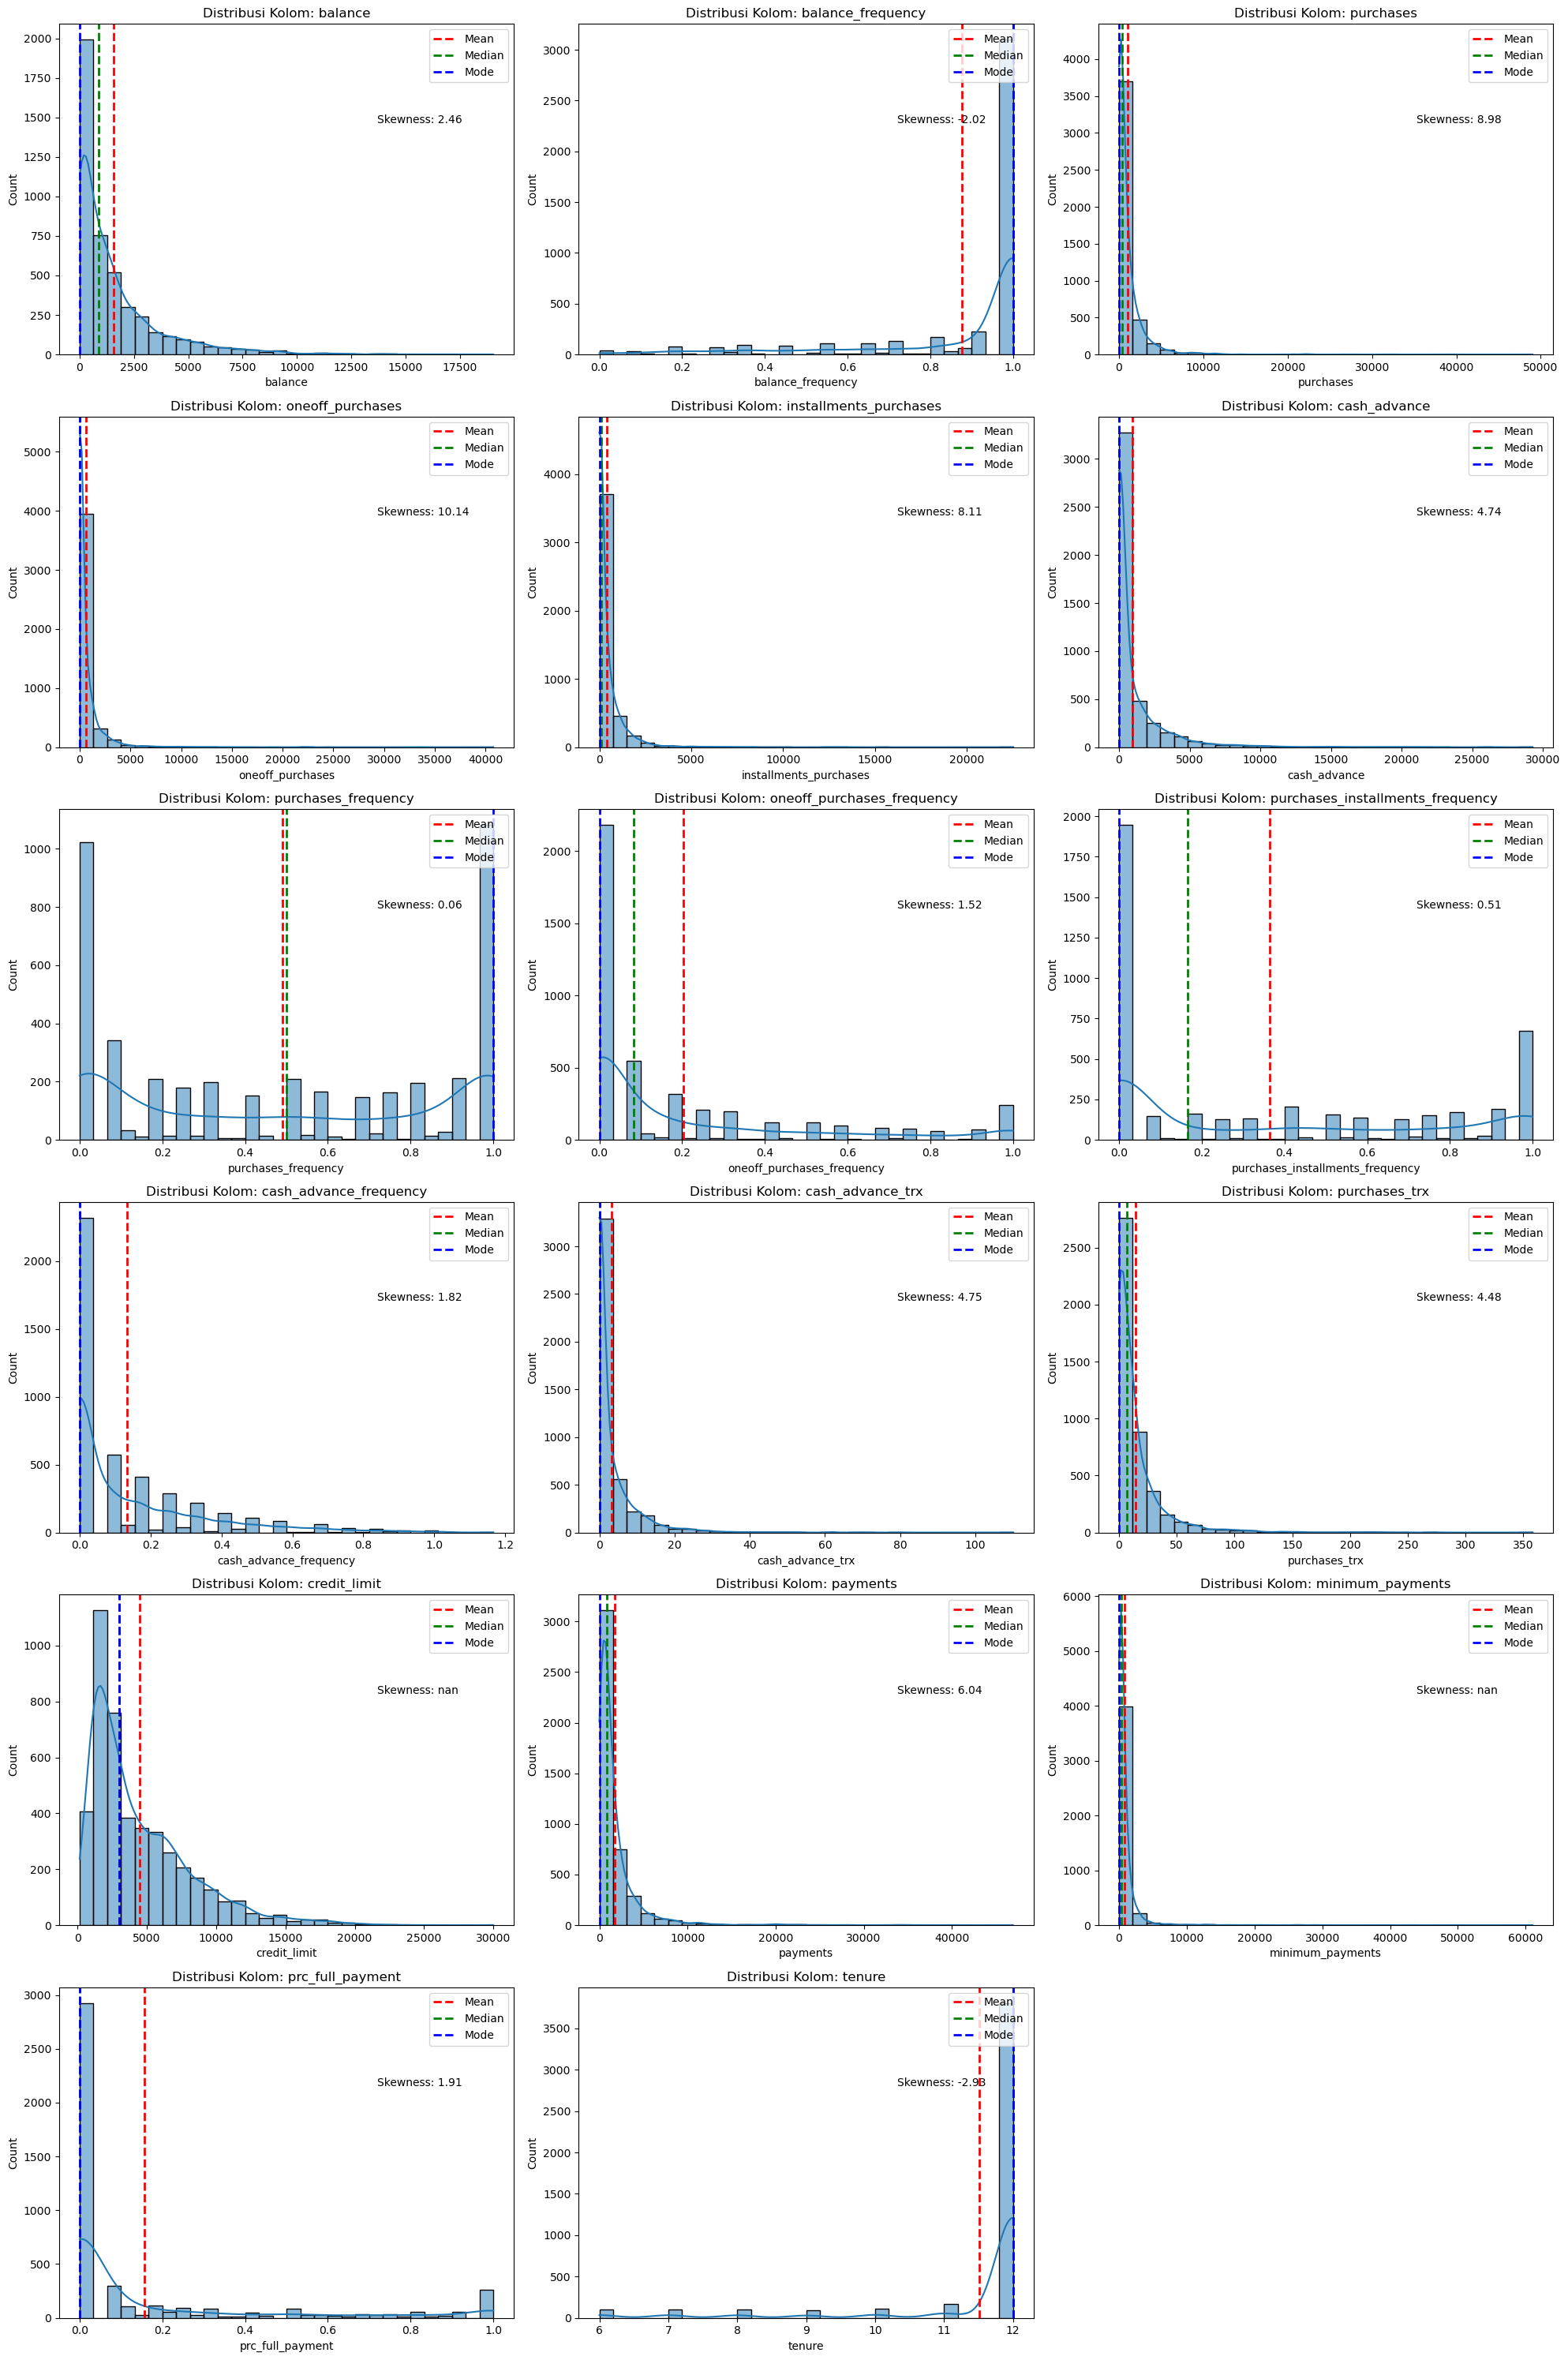

In [9]:
# Mengatur ukuran plot
plt.figure(figsize=(20, 30))

# Iterasi melalui setiap kolom dalam dataframe
for i, col in enumerate(df.columns, 1):
    
    # Membuat subplot dengan 6 baris dan 3 kolom
    plt.subplot(6, 3, i)
    # Menggambar histogram dengan 30 bins dan kernel density estimation (KDE)
    sns.histplot(df[col], bins=30, kde=True)
    # Menambahkan label sumbu x
    plt.xlabel(col)
    # Menambahkan label sumbu y
    plt.ylabel('Count')
    # Menambahkan judul plot
    plt.title(f'Distribusi Kolom: {col}')
    # Menghitung skewness dari data kolom
    skewness = skew(df[col])
    # Menambahkan garis vertikal untuk rata-rata, median, dan modus
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(df[col].mode()[0], color='blue', linestyle='dashed', linewidth=2, label='Mode')
    # Menambahkan legenda (label) di sudut kanan atas
    plt.legend(loc='upper right')
    # Menambahkan teks skewness di sudut kanan atas
    plt.text(0.7, 0.7, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes)

# Mengatur tata letak subplot
plt.tight_layout()
# Menampilkan plot
plt.show()


**Insight:**

- *balance_frequency and tenure have negative skewness values.*

- *purchases_frequency, purchases_installments_frequency have a skewness value close to 0, indicating a relatively symmetric distribution.*

- *The other columns have positive skewness values, indicating that the distribution is skewed to the right.*

## **E.3 - OUTLIERS CHECK**

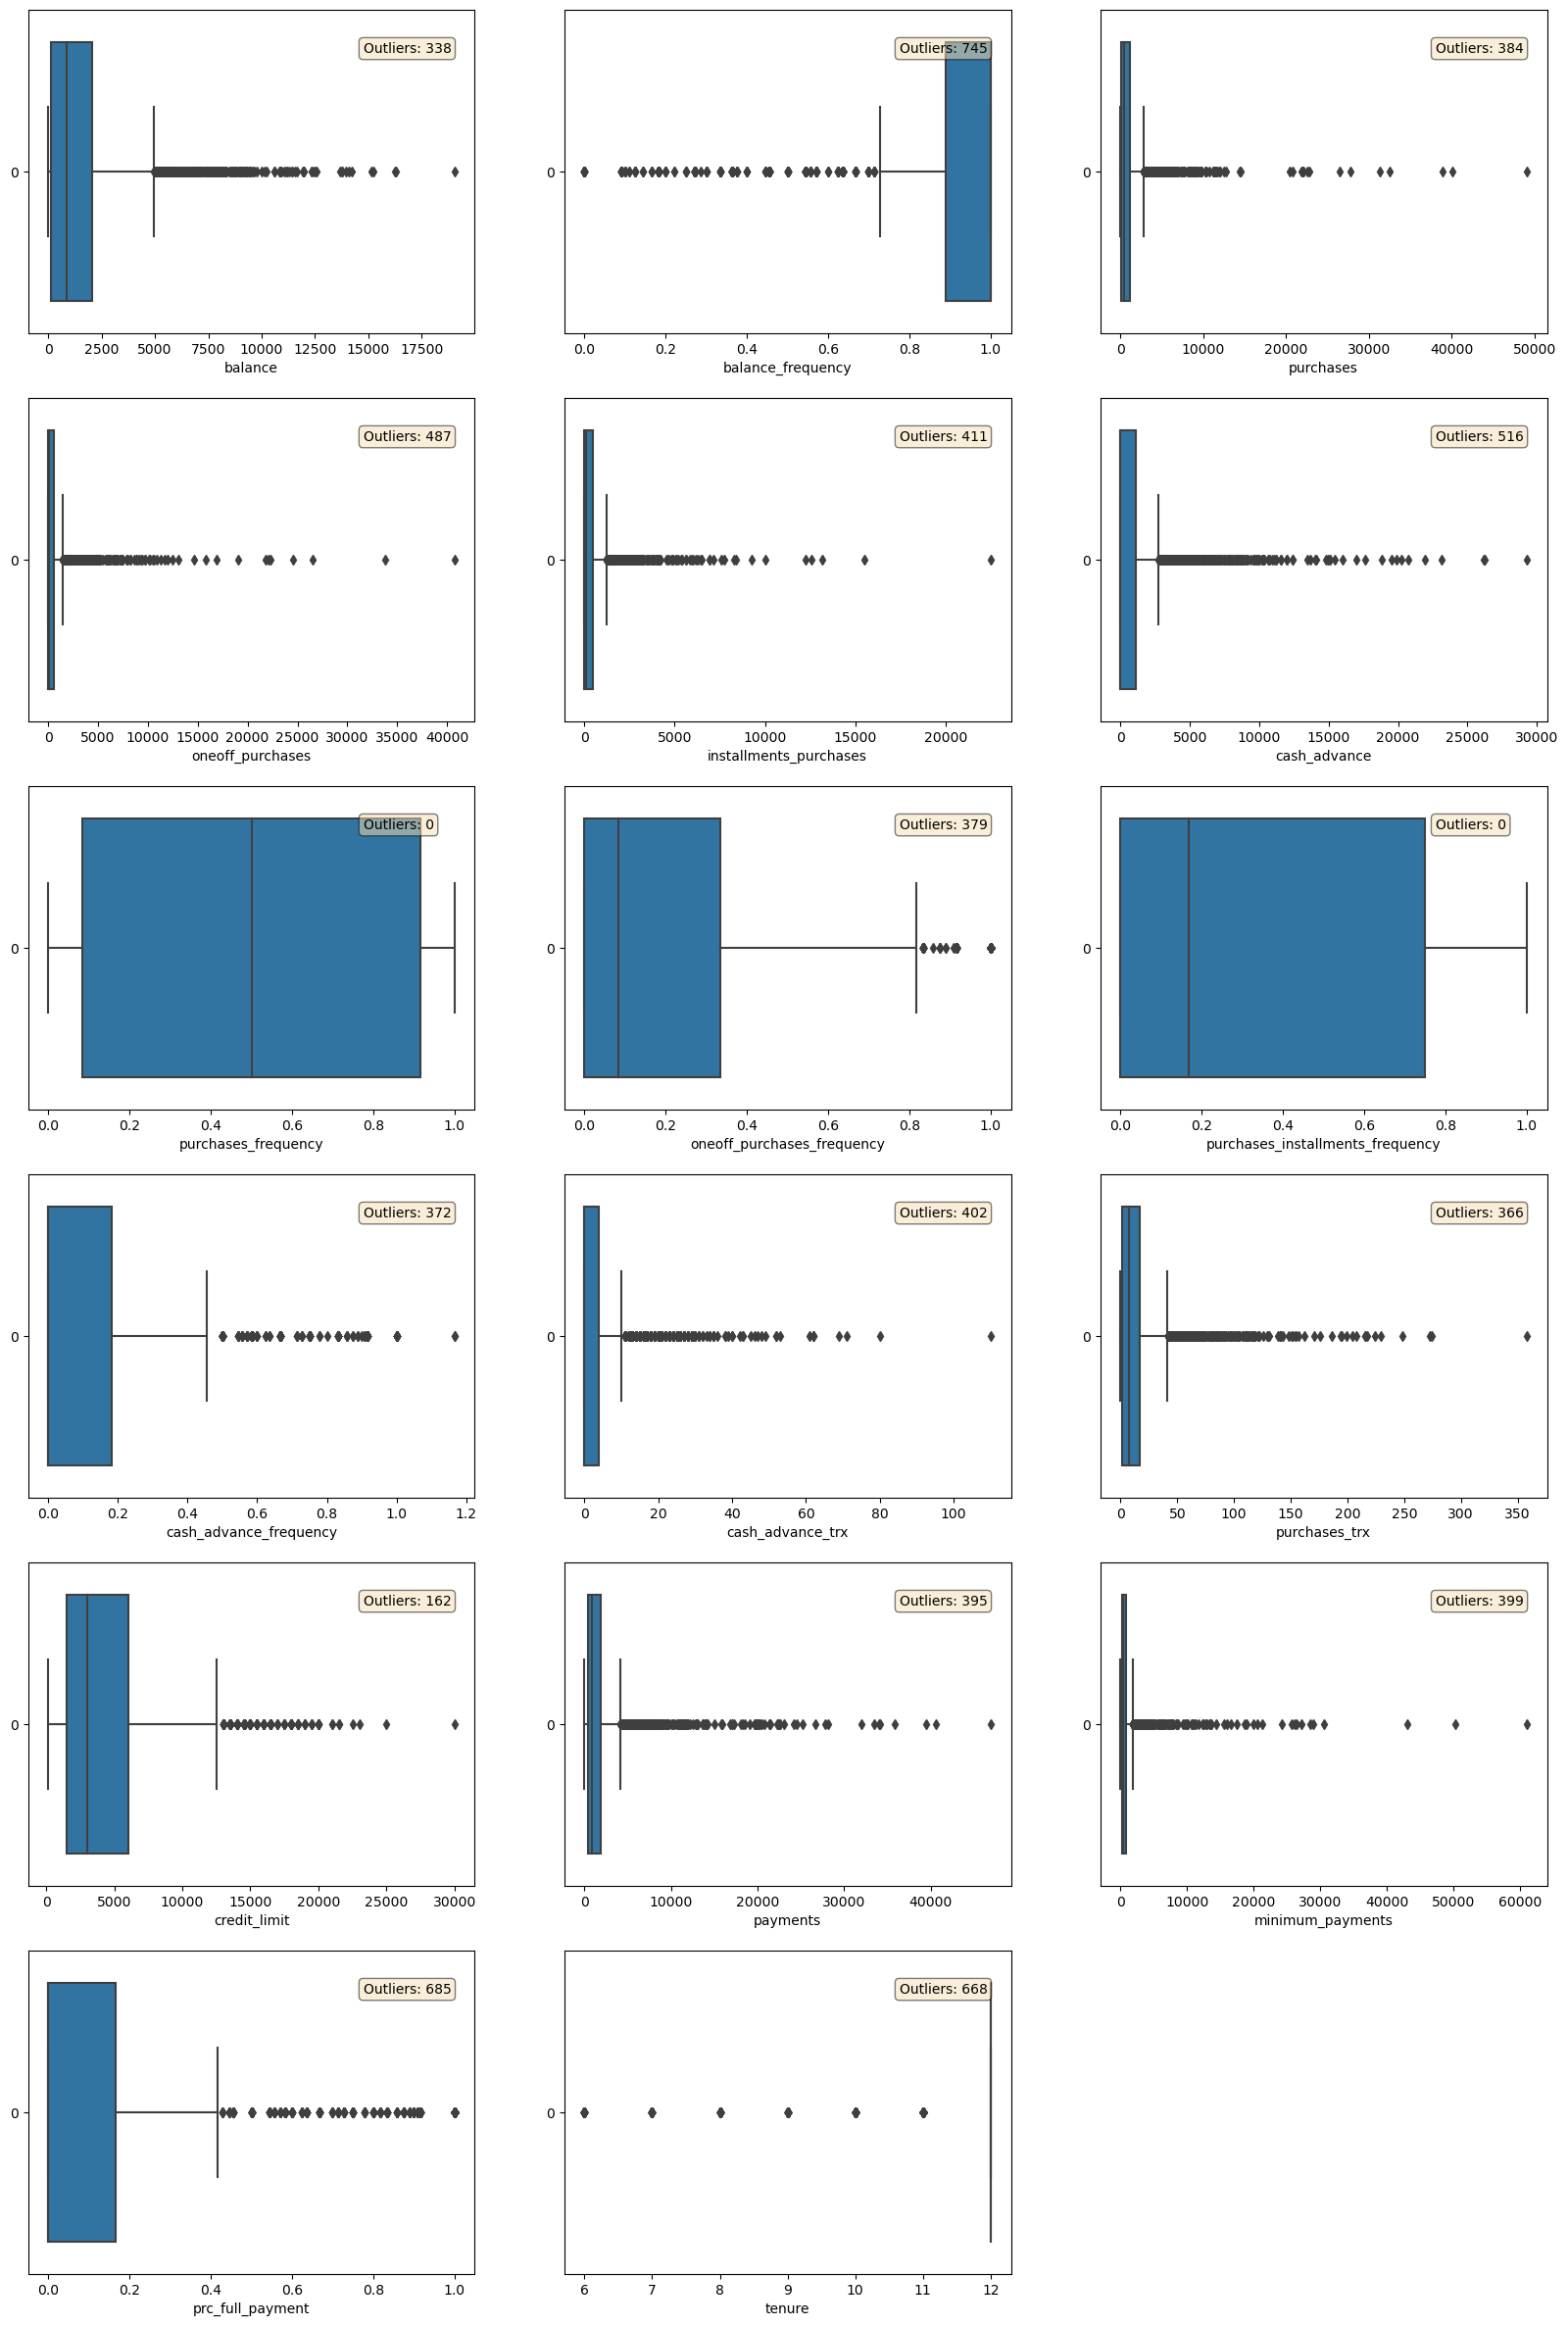

In [10]:
# Menentukan jumlah kolom dan baris untuk tata letak box plot
n_cols = 3
n_rows = (len(df.columns) - 1) // n_cols + 1

# Mengatur ukuran plot
plt.figure(figsize=(20, 30))

# Loop melalui setiap kolom dalam dataframe
for i, col in enumerate(df.columns):
    # Membuat subplot untuk setiap kolom
    ax = plt.subplot(n_rows, n_cols, i + 1)
    # Menggambar box plot horizontal untuk kolom saat ini
    sns.boxplot(df[col], ax=ax, orient='h')
    # Menambahkan label sumbu x
    plt.xlabel(col)

    # Menghitung jumlah outliers menggunakan metode IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)
    
    # Menambahkan teks dengan jumlah outlier ke dalam subplot
    plt.text(0.75, 0.9, f'Outliers: {num_outliers}', transform=ax.transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Menampilkan gambar dengan semua subplot
plt.show()

**Insight:**

- *From the visualization and results above, all columns contain outliers with their respective numbers except the purchases_frequency and purchases_installments_frequency columns.*

## **E.4 - CORRELATION CHECK**

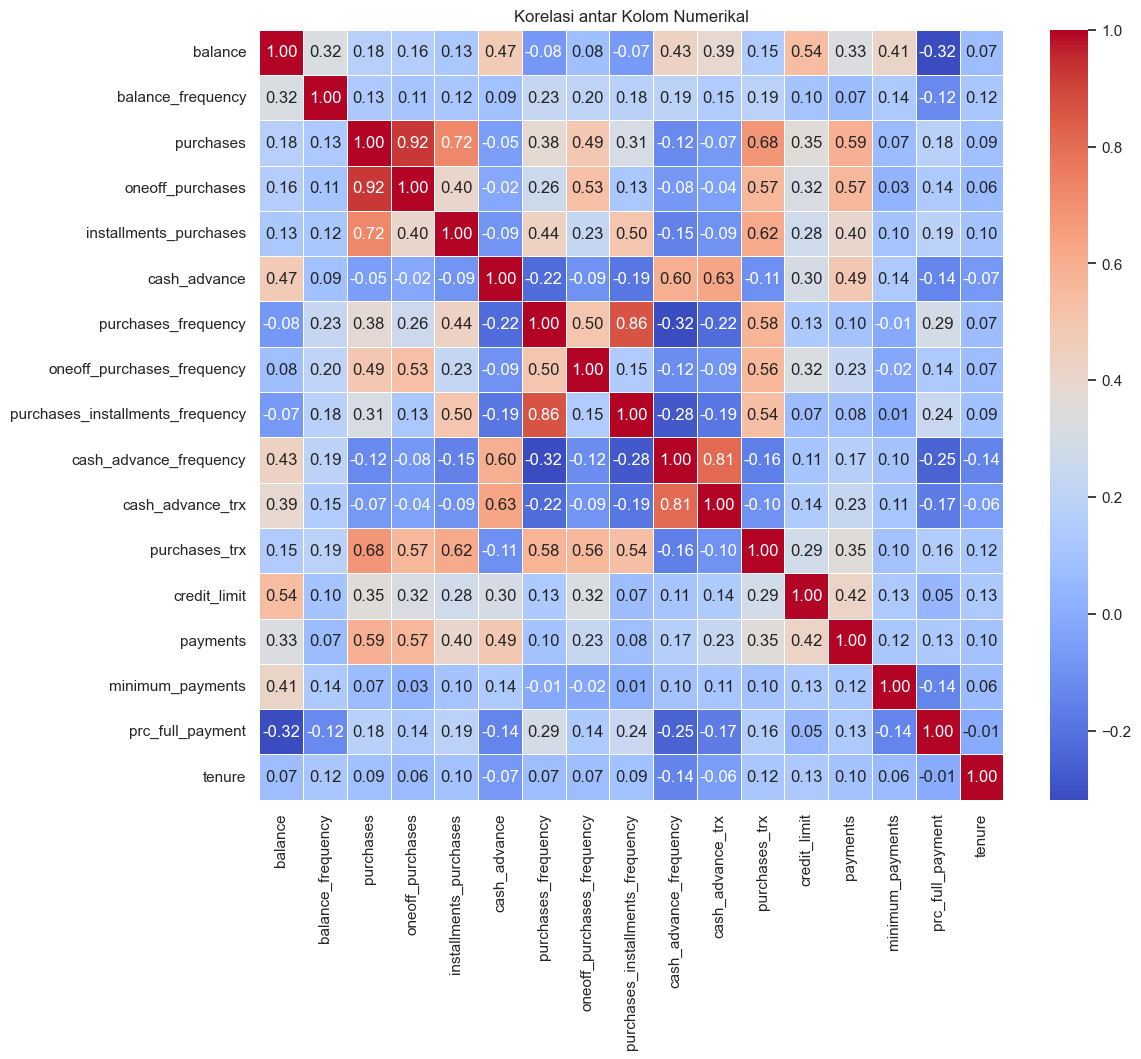

In [11]:
# Hitung matriks korelasi
corr_matrix = df.corr()

# Buat plot heatmap
plt.figure(figsize=(12, 10))
sns.set(style="white")  # Atur gaya latar belakang heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Tampilkan plot
plt.title('Korelasi antar Kolom Numerikal')
plt.show()

**Insight:**

*Highly correlated feature columns are: (purchases, oneoff_purchases), (purchases_frequency, purchases_installments_frequency), (cash_advance_frequency, cash_advance_trx).*

## **E.5 - DUPLICATED DATA CHECK**

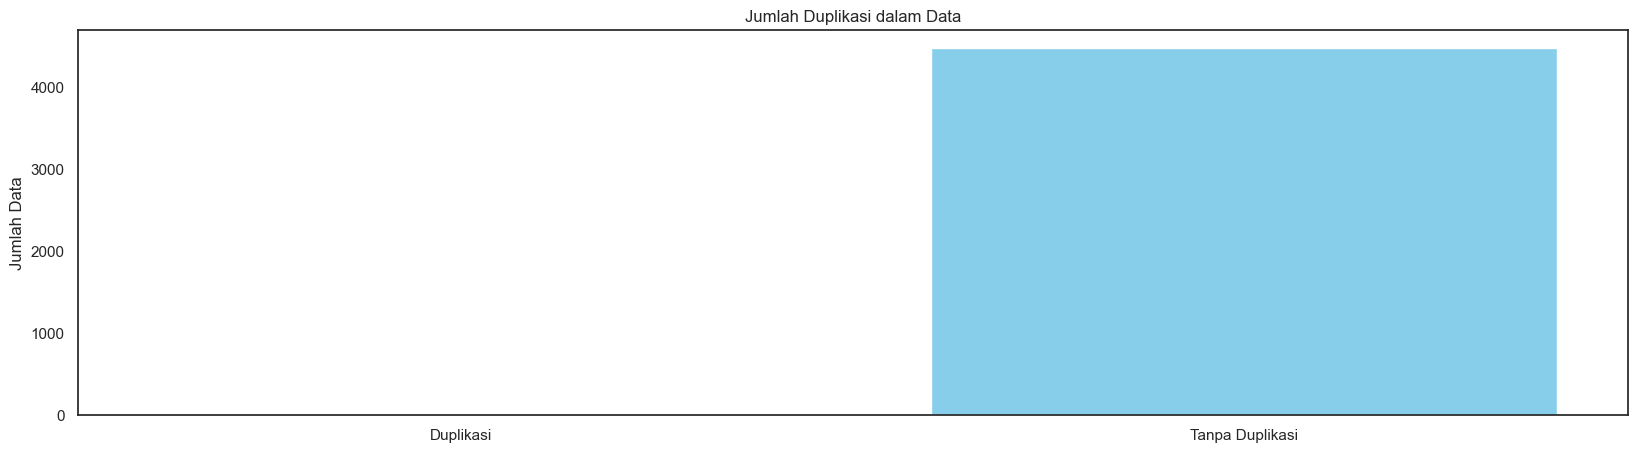

In [12]:
# Menghitung jumlah duplikasi
duplicate_count = df.duplicated().sum()

# Membuat bar plot untuk menunjukkan jumlah duplikasi
plt.figure(figsize=(20, 5))
plt.bar(['Duplikasi', 'Tanpa Duplikasi'], [duplicate_count, len(df) - duplicate_count], color=['red', 'skyblue'])
plt.ylabel('Jumlah Data')
plt.title('Jumlah Duplikasi dalam Data')
plt.show()

**Insight:**

*From the results above, it shows that there is no duplication in this dataset.*

## **E.6 - CARDINALITY CHECK**

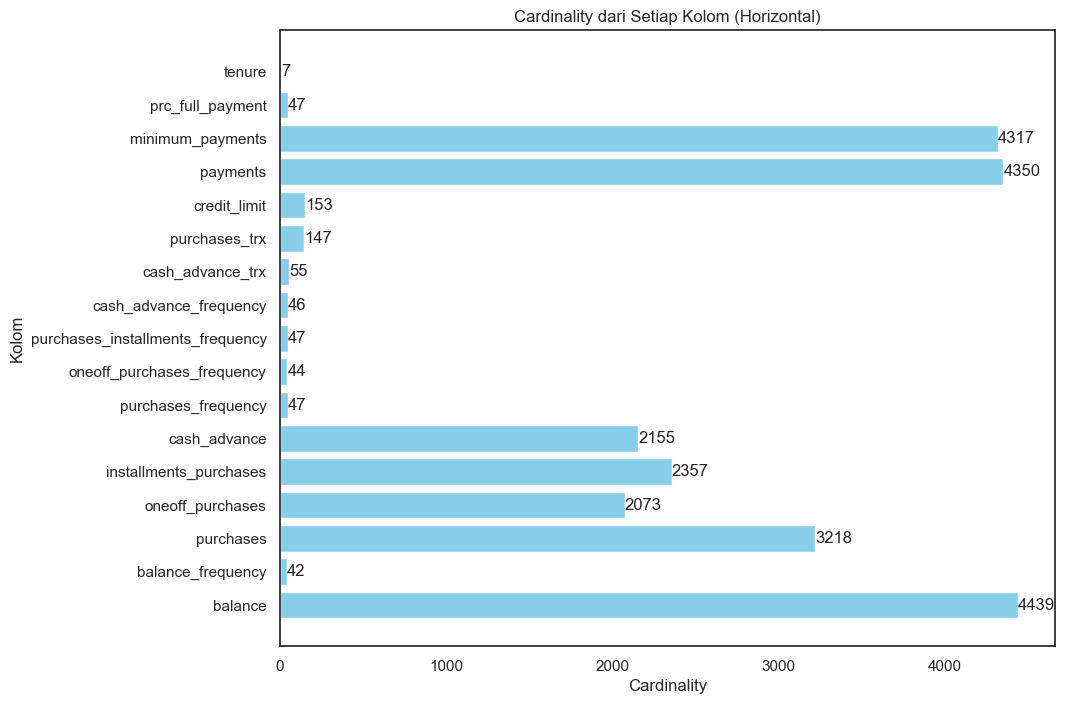

In [13]:
# Menghitung cardinality untuk setiap kolom
cardinality = df.nunique()

# Membuat histogram cardinality secara horizontal untuk setiap kolom
plt.figure(figsize=(10, 8))
ax = plt.barh(cardinality.index, cardinality, color='skyblue')

# Menambahkan jumlah cardinality di dalam setiap bar
for rect in ax:
    width = rect.get_width()
    plt.text(width + 1, rect.get_y() + rect.get_height()/2, f'{width}', ha='left', va='center')

plt.xlabel('Cardinality')
plt.ylabel('Kolom')
plt.title('Cardinality dari Setiap Kolom (Horizontal)')
plt.show()

**Insight:**

*From the results above, it shows that the cardinality level does not need to be handled, because the average column is of continuous numerical data type.*

## **E.7 - MISSING VALUES CHECK**

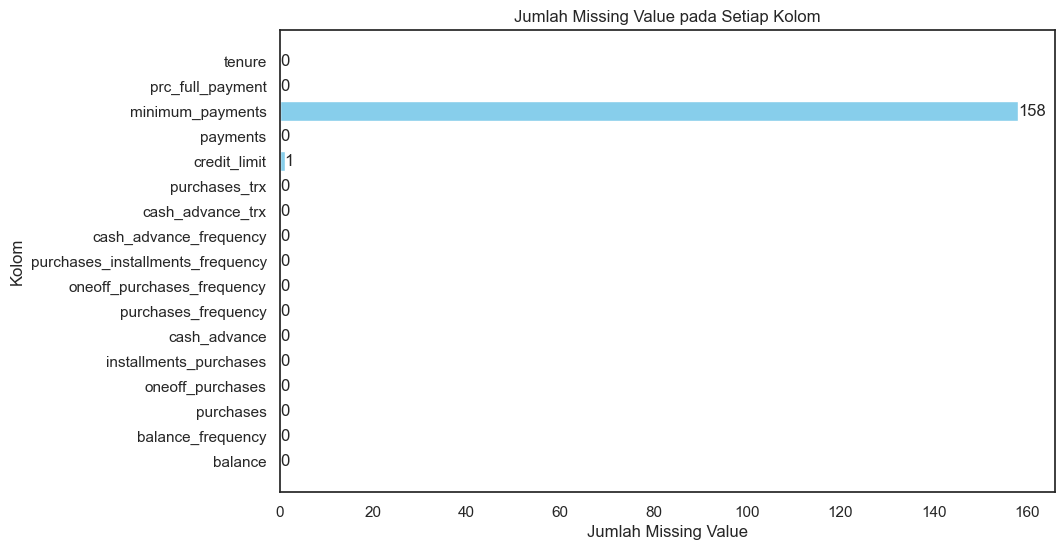

In [14]:
# Menghitung jumlah missing value pada masing-masing kolom
missing_values = df.isnull().sum()

# Membuat dataframe yang berisi kolom dan jumlah missing value
missing_df = pd.DataFrame({'Kolom': missing_values.index, 'Jumlah Missing Value': missing_values.values})

# Visualisasi jumlah missing value dalam bentuk bar plot secara horizontal
plt.figure(figsize=(10, 6))
plt.barh(missing_df['Kolom'], missing_df['Jumlah Missing Value'], color='skyblue')
plt.xlabel('Jumlah Missing Value')
plt.ylabel('Kolom')
plt.title('Jumlah Missing Value pada Setiap Kolom')
for index, value in enumerate(missing_df['Jumlah Missing Value']):
    plt.text(value, index, str(value), va='center')
plt.show()

**Insight:**

*There are missing values in the "minimum_payments" and "credit_limit" columns*

---

# **F - FEATURE ENGINEERING**

After carrying out a more in-depth analysis of the data, feature engineering will now be carried out on the data.

## **F.1 - MISSING VALUE HANDLING**

In the previous EDA section, it was discovered that there were missing values in the 'minimum_payments' and 'credit_limit' feature columns. Here, handling will be carried out by imputation of median and mean.

In [15]:
# Mengganti nilai yang hilang dalam kolom 'minimum_payments' dengan median
df.loc[df.minimum_payments.isnull(), 'minimum_payments'] = df.minimum_payments.median()

# Mengganti nilai yang hilang dalam kolom 'credit_limit' dengan rata-rata
df.loc[df.credit_limit.isnull(), 'credit_limit'] = df.credit_limit.mean()

# Menghitung jumlah nilai yang hilang dalam setiap kolom setelah penggantian
df.isnull().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

**Insight:**

*From the results above it can be seen that missing values have been successfully handled.*

## **F.2 - OUTLIERS HANDLING**

In the previous EDA section, it was discovered that there were many outliers in the feature columns, here we will handle them by imputation based on each range group.

In [16]:
# Membuat salinan dataframe agar tidak mempengaruhi dataframe asli
range_df = df.copy()
# Kolom-kolom yang akan dikelompokkan menjadi kategori numerical continous
range_cols = ['balance', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'credit_limit', 'payments', 'minimum_payments']

# Mengelompokkan nilai dalam kolom-kolom tersebut ke dalam kategori berdasarkan rentang nilai
for i in range_cols:
    # Kategori 1: Nilai antara 1 hingga 500
    range_df.loc[(range_df[i] > 0) & (range_df[i] <= 500), i] = 1
    # Kategori 2: Nilai antara 501 hingga 1000
    range_df.loc[(range_df[i] > 500) & (range_df[i] <= 1000), i] = 2
    # Kategori 3: Nilai antara 1001 hingga 3000
    range_df.loc[(range_df[i] > 1000) & (range_df[i] <= 3000), i] = 3
    # Kategori 4: Nilai antara 3001 hingga 5000
    range_df.loc[(range_df[i] > 3000) & (range_df[i] <= 5000), i] = 4
    # Kategori 5: Nilai antara 5001 hingga 7000
    range_df.loc[(range_df[i] > 5000) & (range_df[i] <= 7000), i] = 5
    # Kategori 6: Nilai antara 7001 hingga 10000
    range_df.loc[(range_df[i] > 7000) & (range_df[i] <= 10000), i] = 6
    # Kategori 7: Nilai di atas 10000
    range_df.loc[(range_df[i] > 10000), i] = 7


In [17]:
# Daftar kolom yang akan diimputasi dengan nilai kategori berdasarkan rentang persentase
range_cols = ['balance_frequency', 'purchases_frequency', 'oneoff_purchases_frequency', 
                'purchases_installments_frequency', 'cash_advance_frequency', 'prc_full_payment']

# imputing the range of 1 to 10 where column values is percentage
# Iterasi melalui setiap kolom yang akan diimputasi
for i in range_cols:
    # Imputasi nilai-nilai dalam rentang 0-0.1 dengan kategori 1 dst
    range_df.loc[(range_df[i] > 0) & (range_df[i] <= 0.1), i] = 1
    range_df.loc[(range_df[i] > 0.1) & (range_df[i] <= 0.2), i] = 2
    range_df.loc[(range_df[i] > 0.2) & (range_df[i] <= 0.3), i] = 3
    range_df.loc[(range_df[i] > 0.3) & (range_df[i] <= 0.4), i] = 4
    range_df.loc[(range_df[i] > 0.4) & (range_df[i] <= 0.5), i] = 5
    range_df.loc[(range_df[i] > 0.5) & (range_df[i] <= 0.6), i] = 6
    range_df.loc[(range_df[i] > 0.6) & (range_df[i] <= 0.7), i] = 7
    range_df.loc[(range_df[i] > 0.7) & (range_df[i] <= 0.8), i] = 8
    range_df.loc[(range_df[i] > 0.8) & (range_df[i] <= 0.9), i] = 9
    range_df.loc[(range_df[i] > 0.9) & (range_df[i] <= 1), i] = 10

In [18]:
# Mendefinisikan kolom-kolom yang akan dikelompokkan
range_cols = ['cash_advance_trx', 'purchases_trx']

# Menerapkan kategorisasi untuk setiap kolom
for i in range_cols:
    # Kategori 1: Nilai antara 1 dan 5 inklusif dst
    range_df.loc[(range_df[i] > 0) & (range_df[i] <= 5), i] = 1
    range_df.loc[(range_df[i] > 5) & (range_df[i] <= 10), i] = 2
    range_df.loc[(range_df[i] > 10) & (range_df[i] <= 20), i] = 3
    range_df.loc[(range_df[i] > 20) & (range_df[i] <= 40), i] = 4
    range_df.loc[(range_df[i] > 40) & (range_df[i] <= 70), i] = 5
    range_df.loc[(range_df[i] > 70) & (range_df[i] <= 100), i] = 6
    range_df.loc[(range_df[i] > 100) & (range_df[i] <= 150), i] = 7
    range_df.loc[(range_df[i] > 150) & (range_df[i] <= 200), i] = 8
    range_df.loc[(range_df[i] > 200) & (range_df[i] <= 300), i] = 9
    range_df.loc[(range_df[i] > 300), i] = 10

**Insight:**

*From the syntax above, it shows that there are no errors, this shows that the outliers in the data have been successfully handled.*

## **F.3 - SCALING**

To equalize the range of values for the column, here I will perform scaling using the Standard Scaler because the data has been handled and is normally distributed.

In [19]:
# Melakukan scaling menggunakan StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(range_df)

## **F.4 - DIMENSIONALITY REDUCTION WITH PCA**

Because there are too many feature columns, here I will carry out dimension reduction using the PCA technique.

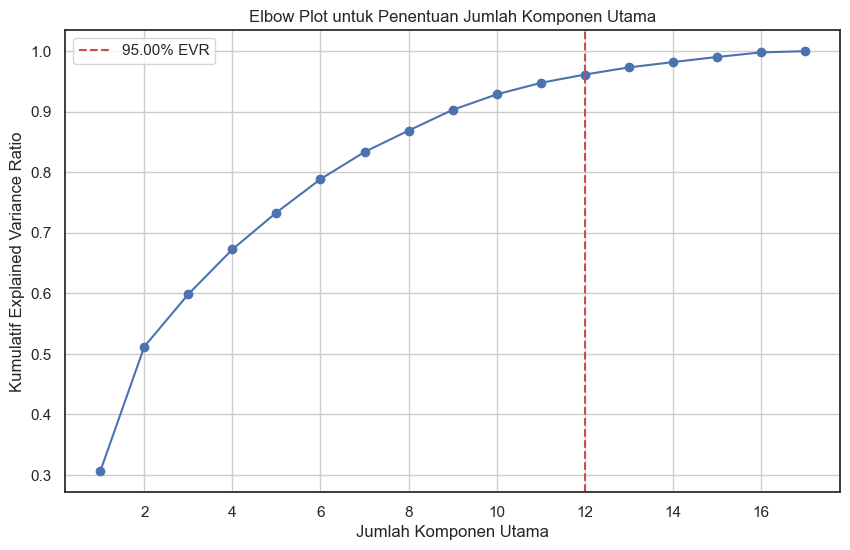

In [20]:
# Menerapkan PCA
pca = PCA()
pca.fit(df_scaled)

# Menghitung cumulative explained variance ratio (EVR)
cumulative_evr = np.cumsum(pca.explained_variance_ratio_)

# Membuat elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_evr) + 1), cumulative_evr, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Kumulatif Explained Variance Ratio')
plt.title('Elbow Plot untuk Penentuan Jumlah Komponen Utama')
plt.grid(True)

# Menandai titik elbow
explained_variance_threshold = 0.95  # Misalnya, ambang batas 95%
n_components = np.argmax(cumulative_evr >= explained_variance_threshold) + 1
plt.axvline(x=n_components, color='r', linestyle='--', label=f'{explained_variance_threshold*100:.2f}% EVR')

plt.legend()
plt.show()

In [21]:
# Output jumlah komponen utama yang sesuai
print(f'Jumlah komponen utama yang sesuai: {n_components}')

Jumlah komponen utama yang sesuai: 12


**Insight:**

*From the EVR plot above, it can be seen that to achieve 95% EVR, 12 main components are needed when viewed from the elbow point.*

In [22]:
# Menerapkan PCA dengan jumlah komponen utama yang sesuai (12)
pca = PCA(n_components=12)
reduced_data = pca.fit_transform(df_scaled)

**Insight:**

*From the syntax above, it shows that the data has been successfully reduced in dimensions to 12 and fit and transform have been carried out.*

# **G - MODEL DEFINITION**

## **G.1 - K-MEANS (ELBOW METHOD)**

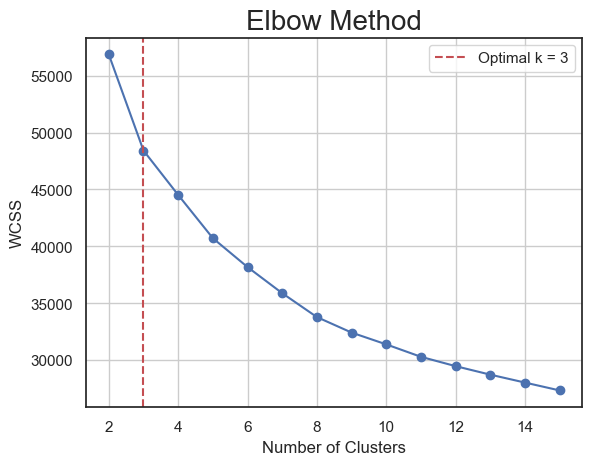

In [23]:
inertia_values = []  # Inisialisasi daftar untuk menyimpan nilai inertia
random_state = 10  # Seed untuk inisialisasi acak, untuk hasil yang konsisten
max_cluster = 15  # Jumlah maksimal klaster yang akan diuji

# Loop melalui berbagai jumlah klaster untuk menghitung inertia:
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters=i,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=random_state)  # Membuat objek KMeans dengan berbagai jumlah cluster
    km.fit(reduced_data)  # Melatih model KMeans pada data yang telah direduksi
    inertia_values.append(km.inertia_)  # Menyimpan nilai inertia dalam daftar

# Menggambar plot Elbow Method untuk membantu menentukan jumlah cluster yang optimal:
plt.plot(range(2, max_cluster+1), inertia_values, marker="o")  # Plot nilai inertia vs. jumlah cluster
plt.grid()  # Menambahkan grid pada plot
plt.title('Elbow Method', fontsize=20)  # Menambahkan judul plot
plt.xlabel('Number of Clusters')  # Menambahkan label sumbu x
plt.ylabel('WCSS')  # Menambahkan label sumbu y

# Menambahkan garis untuk menunjukkan titik elbow yang optimal (misalnya, di k = 3):
optimal_k = 3 # Dapat diganti dengan jumlah klaster yang sesuai
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')

plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan plot

**Insight:**

*From the elbow plot above, the location of the elbow is in cluster 3.*

## **G.2 - K-MEANS (SILHOUTTE METHOD SCIKIT-LEARN)**

In [24]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Membuat subplot dengan 1 row dan 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # Subplot pertama adalah Silhoutte plot
        # Koefisien Silhoutte dapat berkisar dari -1, 1 tetapi dalam contoh ini semuanya berada dalam kisaran [-0,1, 1]
        ax1.set_xlim([-0.1, 1])
        # (n_clusters+1)*10 adalah untuk menyisipkan ruang kosong di antara plot siluet masing-masing cluster, untuk membatasinya dengan jelas
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Inisialisasi clusterer dengan nilai n_clusters dan seed generator acak 10 untuk reproduktifitas
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # Silhouette_score memberikan nilai rata-rata untuk semua sampel
        # Hal ini memberikan perspektif mengenai kepadatan dan pemisahan cluster yang terbentuk
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Hitung skor siluet untuk setiap sampel:
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Gabungkan skor siluet untuk sampel yang termasuk dalam cluster i, dan urutkan
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Beri label pada plot siluet dengan nomor clusternya di tengah
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Hitung y_lower baru untuk plot berikutnya
            y_lower = y_upper + 10  # 10 untuk 0 sampel

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # Garis vertikal untuk skor siluet rata-rata dari semua nilai
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Hapus label/centang yaxis
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # Plot ke-2 menunjukkan cluster sebenarnya yang terbentuk
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Memberi label pada cluster
        centers = clusterer.cluster_centers_

        # Menggambar lingkaran putih di pusat cluster
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.221669484381392
For n_clusters = 3 The average silhouette_score is : 0.1972987800908662
For n_clusters = 4 The average silhouette_score is : 0.18404565786016278
For n_clusters = 5 The average silhouette_score is : 0.1863176125010904
For n_clusters = 6 The average silhouette_score is : 0.18358190057103738
For n_clusters = 7 The average silhouette_score is : 0.19053518342989423
For n_clusters = 8 The average silhouette_score is : 0.19185953630419592
For n_clusters = 9 The average silhouette_score is : 0.18607072198346916
For n_clusters = 10 The average silhouette_score is : 0.1726857654467567
For n_clusters = 11 The average silhouette_score is : 0.18674914705435408
For n_clusters = 12 The average silhouette_score is : 0.17968202621355508
For n_clusters = 13 The average silhouette_score is : 0.16701032977711003
For n_clusters = 14 The average silhouette_score is : 0.17658955156204703


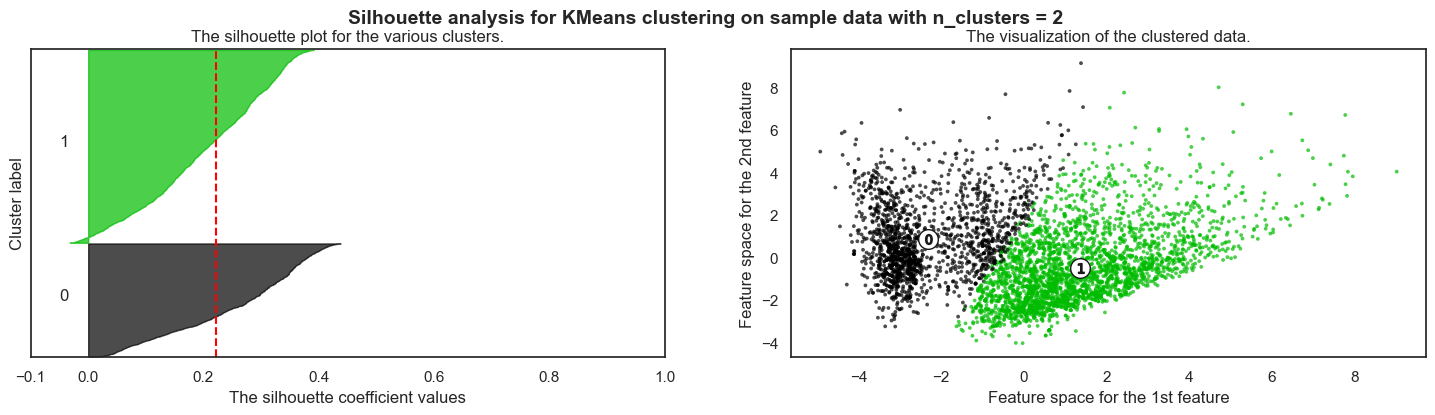

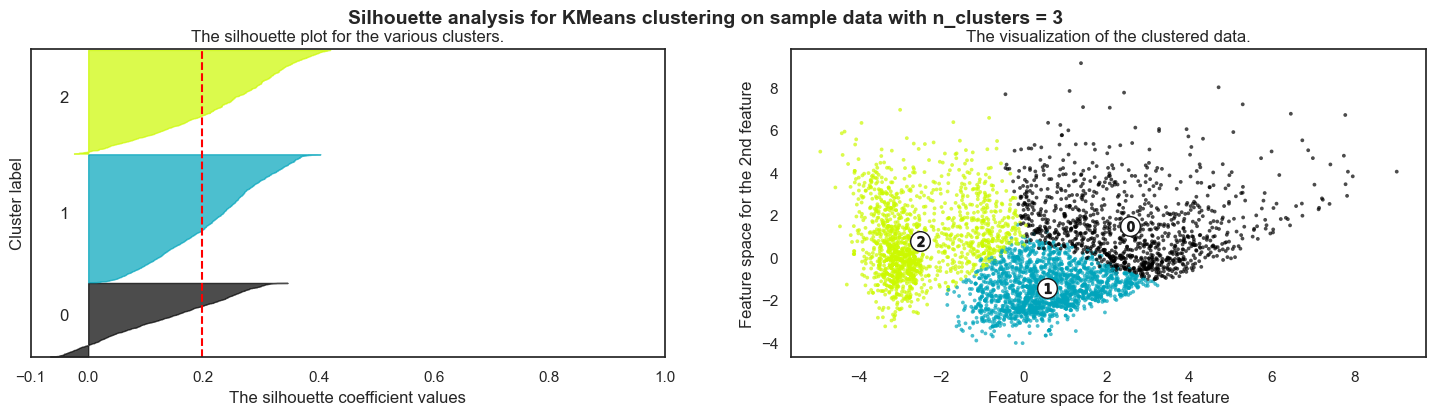

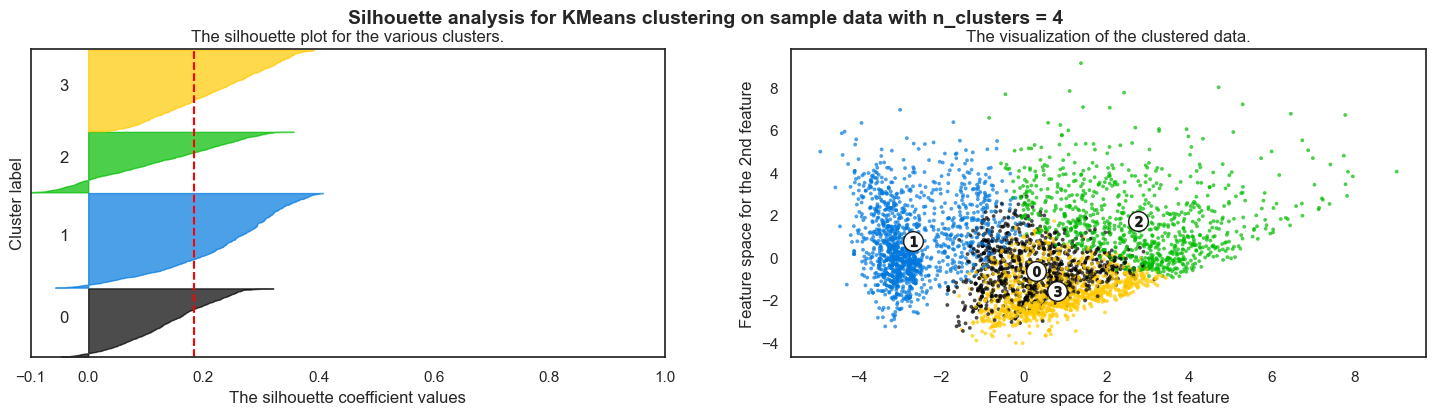

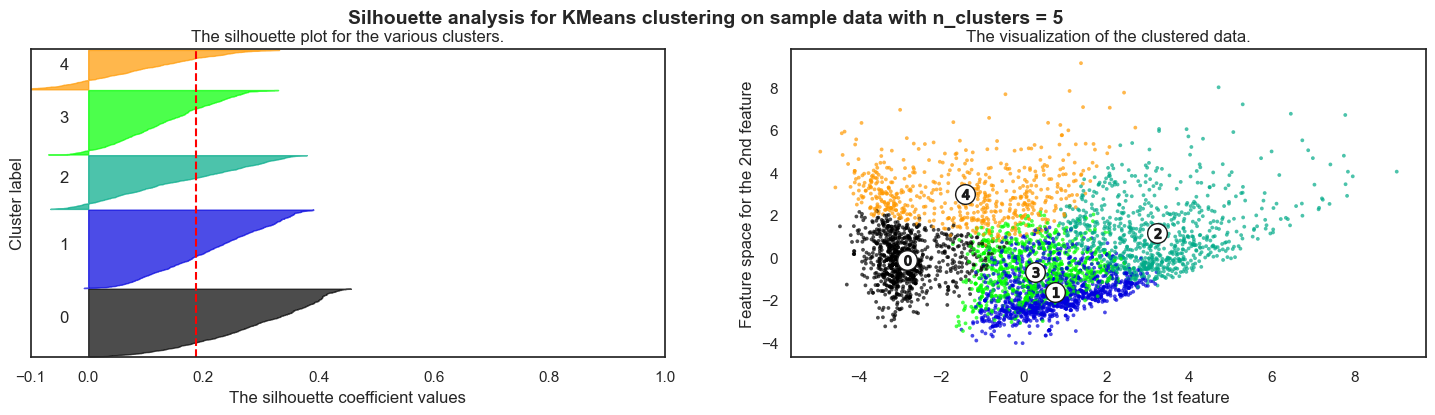

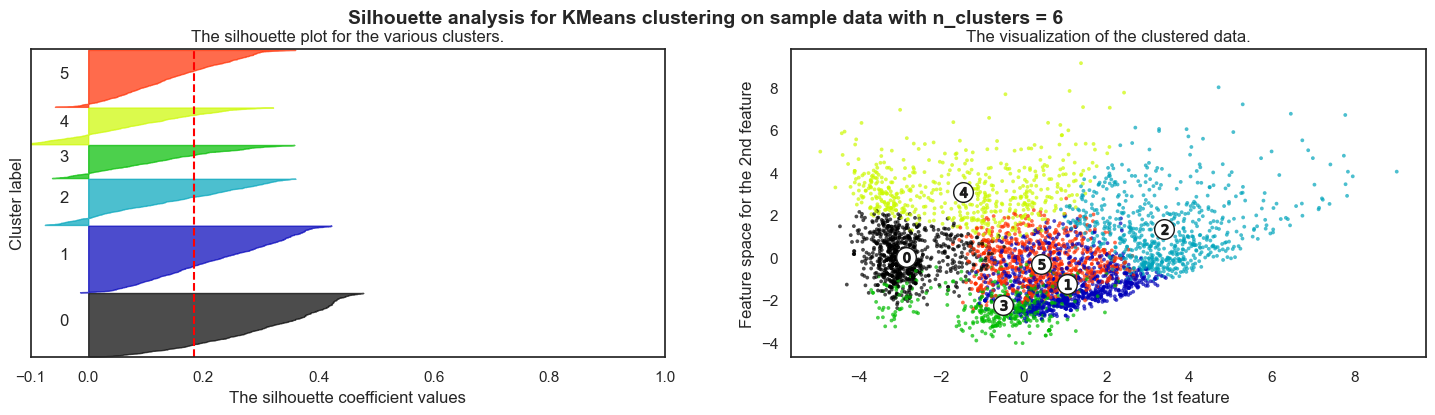

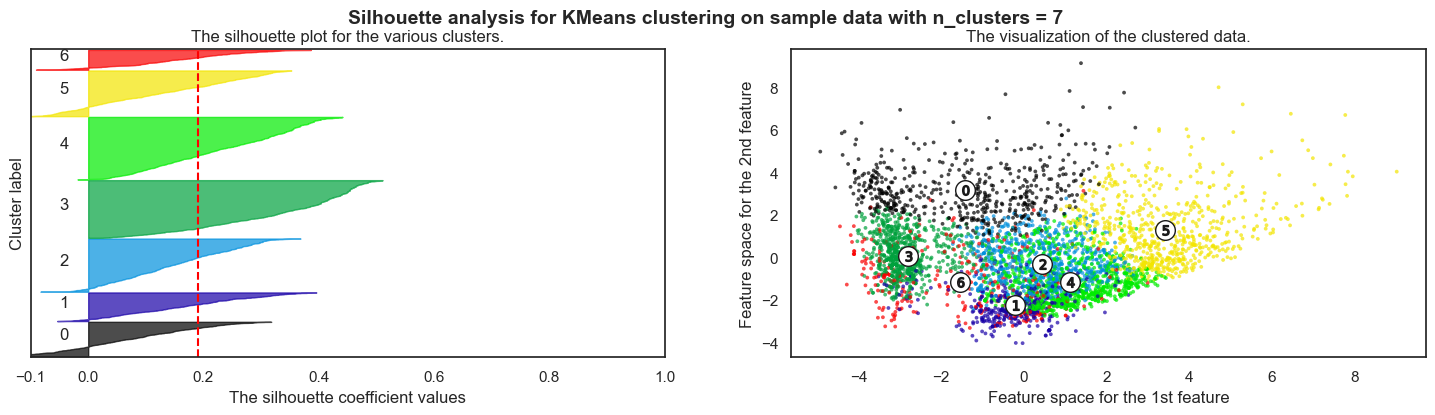

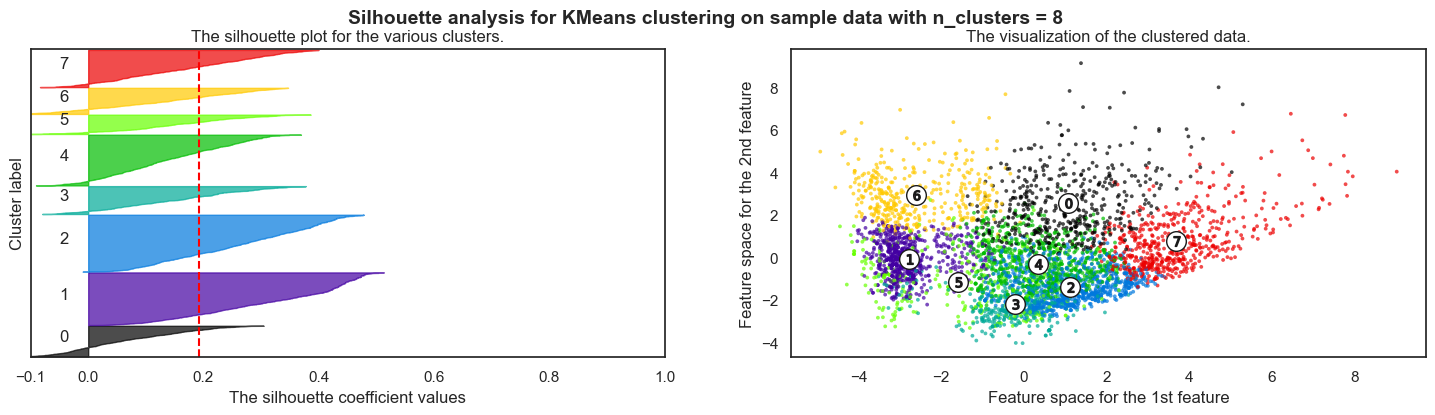

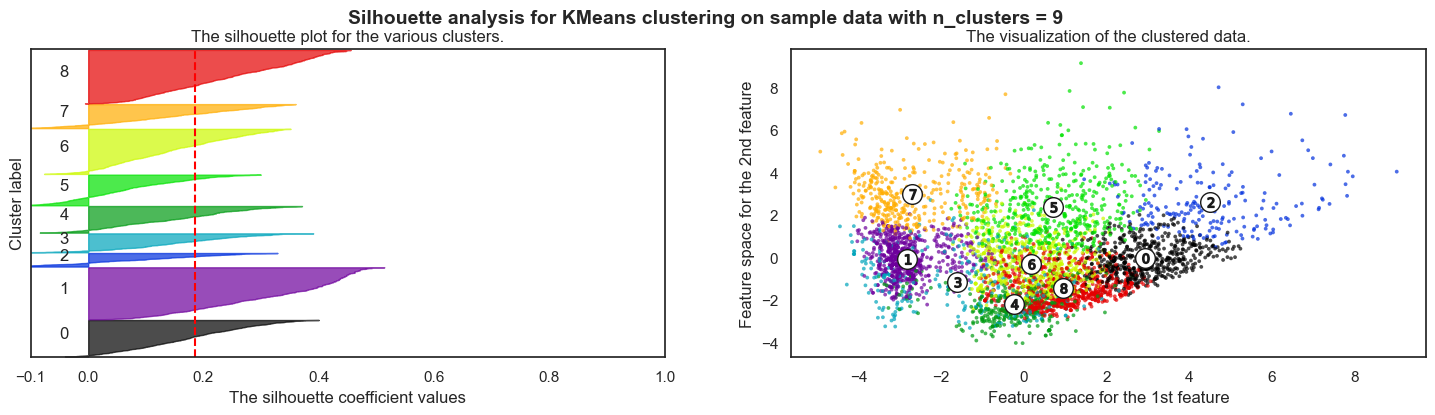

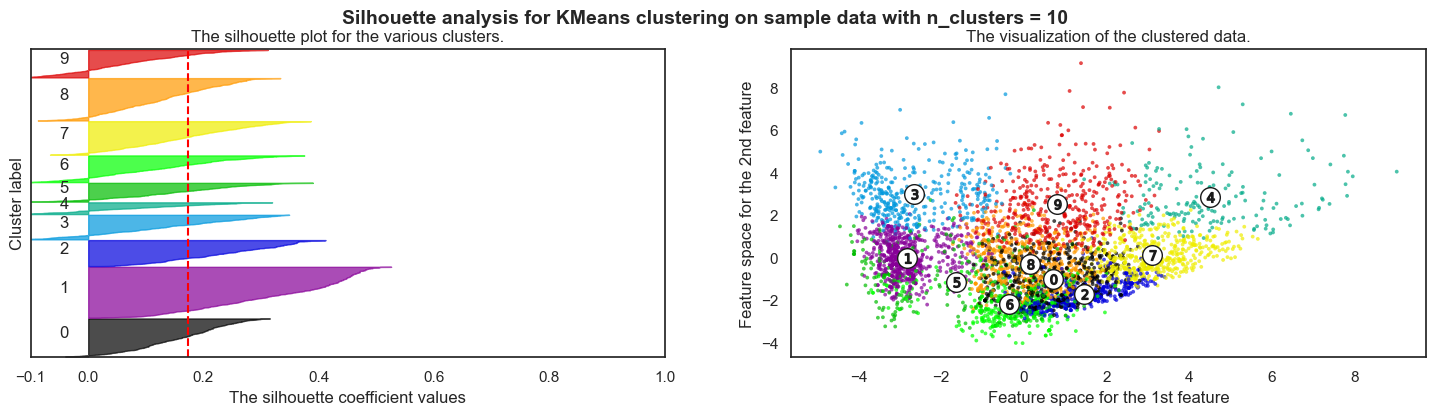

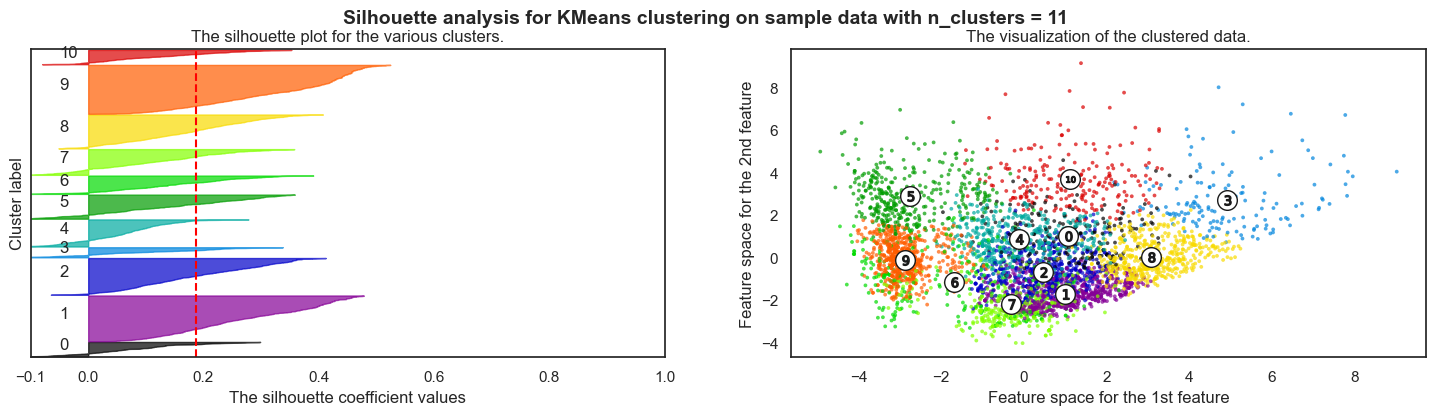

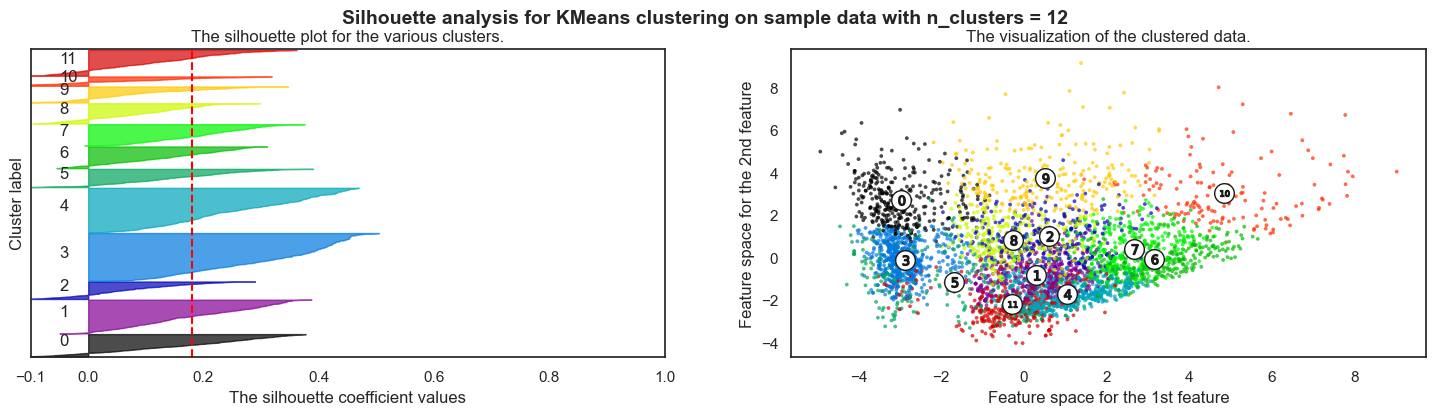

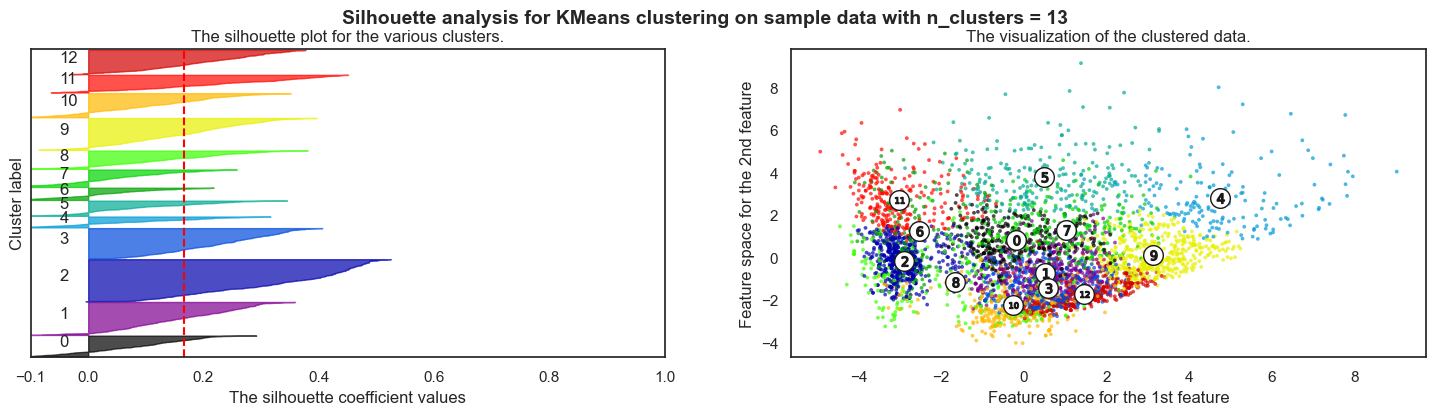

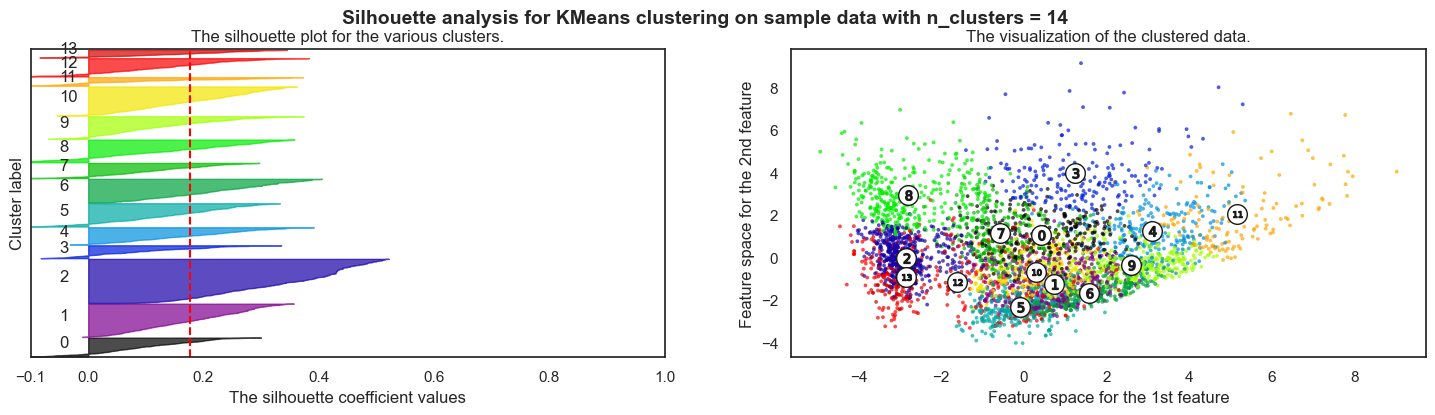

In [25]:
# Melihat Silhoutte Score dan Plot
plot_silhouette(range(2, max_cluster), reduced_data, random_state)

**Insight:**

*From the results of the silhouette score and plot above, I will choose the number of clusters = 3 which have the score and silhouette that I think are the best.*

---

# **H - MODEL TRAINING**

After finding the number of clusters, next I will predict the data.

In [26]:
# Menginisialisasi model K-Means dengan 3 cluster, menggunakan inisialisasi k-means++ untuk memilih titik awal cluster
# dengan jumlah iterasi maksimum 300, dan n_init (jumlah inisialisasi berbeda) sebanyak 10
# dengan random_state yang diatur untuk memastikan hasil yang sama setiap kali menjalankan model.
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
# Melatih model K-Means pada data yang sudah direduksi menggunakan PCA
pred = km.fit_predict(reduced_data)
pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [27]:
# Memasukkan kolom hasil prediksi ke dalam data
df['cluster'] = pred
df

balance  balance_frequency  purchases  oneoff_purchases  \
0       16.581535           0.125000     200.00              0.00   
1      943.584041           0.875000     103.00            103.00   
2        1.979916           0.125000      80.00             80.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1595.93   
4474  1977.007090           1.000000    1032.04            226.90   

      installments_purchases  cash_advance  purchases_frequency  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      oneoff_purchases_frequency  purchases_installments_frequency  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         payments  minimum_payments  prc_full_payment  tenure  cluster  
0        0.000000        309.854995          0.000000       8        1  
1      215.325023        410.484825          0.000000       8        1  
2        0.000000        309.854995          0.000000       8        1  
3      258.032630        151.696433          0.000000       8        1  
4      397.090516        227.143184          0.000000       8        1  
...           ...               ...               ...     ...      ...  
4470  1379.635287        271.364415          0.090909      11        2  
44

<Axes: >

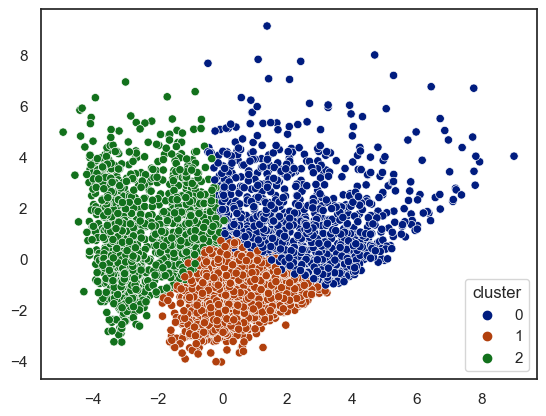

In [28]:
# Menerapkan PCA dengan 2 komponen utama untuk visualisasi 2D
pca_2d = PCA(n_components=2)
# Melakukan fit PCA ke data yang sudah direduksi sebelumnya
pca_2d.fit(reduced_data)
# Transformasikan data ke ruang fitur PCA 2D
reduced_data_pca_2d = pca_2d.fit_transform(reduced_data)

# Buat scatterplot untuk visualisasi data dalam 2D
sns.scatterplot(x=reduced_data_pca_2d[:, 0],  # Koordinat X dari komponen utama pertama
                y=reduced_data_pca_2d[:, 1],  # Koordinat Y dari komponen utama kedua
                hue=df['cluster'],            # Gunakan 'cluster' sebagai penanda warna
                palette='dark')               # Palet warna yang digunakan

---

# **I - MODEL EVALUATION**

## **I.1 - QUANTITY OF EACH CLUSTER**

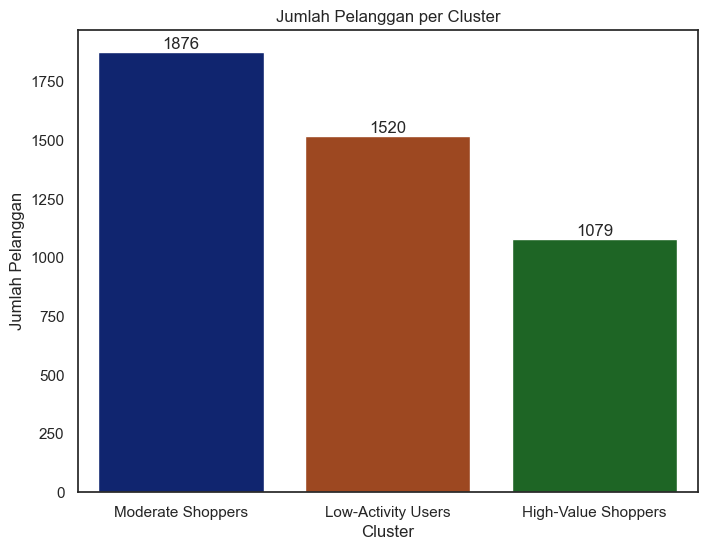

In [29]:
# Ganti nama cluster
cluster_names = {
    0: 'High-Value Shoppers',
    1: 'Moderate Shoppers',
    2: 'Low-Activity Users'
}

# Hitung jumlah pelanggan per cluster
cluster_counts = df['cluster'].map(cluster_names).value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Jumlah Pelanggan']

# Visualisasikan jumlah pelanggan per cluster
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Jumlah Pelanggan', data=cluster_counts, palette='dark')
plt.title('Jumlah Pelanggan per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Pelanggan')

# Tambahkan nilai pada setiap bar cluster
for index, row in cluster_counts.iterrows():
    plt.text(index, row['Jumlah Pelanggan'], row['Jumlah Pelanggan'], ha='center', va='bottom')

plt.show()

**Insight:**

- Segment 0: High-Value Shoppers (1079 customers)
- Segment 1: Moderate Shoppers (1876 customers)
- Segment 2: Low-Activity Users (1520 customers)

## **I.2 - CLUSTER CHARACTERISTICS**

In [30]:
# Melakukan groupby kepada data untuk menghitung statistik per cluster
cluster_profiles = df.groupby('cluster').mean()  # Gunakan .mean() atau .median() sesuai kebutuhan

# Tampilkan profil cluster
print(cluster_profiles)

             balance  balance_frequency    purchases  oneoff_purchases  \
cluster                                                                  
0        2419.681448           0.980854  3032.690120       1893.912261   
1         451.089553           0.798461   545.898086        242.629808   
2        2335.278844           0.902002   126.813191         88.719967   

         installments_purchases  cash_advance  purchases_frequency  \
cluster                                                              
0                   1138.843865    912.504483             0.873514   
1                    304.081039     60.930761             0.581903   
2                     38.137270   2142.964956             0.104687   

         oneoff_purchases_frequency  purchases_installments_frequency  \
cluster                                                                 
0                          0.521469                          0.670145   
1                          0.142736                        

Based on the descriptive statistics for each cluster above, the following is an interpretation of the characteristics of each cluster:

**Cluster 0: High-Value Shoppers**
- The average balance is quite high ($2419.68) and tends to be updated frequently (balance_frequency = 98%).
- They tend to make large purchases ($3032.69) with significant oneoff_purchases ($1893.91).
- They also tend to make purchases in fairly large installments (installments_purchases) ($1138.84).
- Cash advance usage is relatively high ($912.50).
- Purchase frequency (purchases_frequency) is high (87%) with most purchases in one transaction (oneoff_purchases_frequency = 52%).

**Cluster 1: Moderate Shoppers**
- The average balance is relatively low ($451.09) with a lower balance update frequency (balance_frequency = 80%).
- Purchases are at a moderate level ($545.90) with one-time purchases (oneoff_purchases) and installment purchases (installments_purchases) balanced.
- Lower cash advance usage ($60.93).
- Purchase frequency (purchases_frequency) is moderate (58%) with a tendency to make installment purchases (purchases_installments_frequency = 44%).

**Cluster 2: Low-Activity Users**
- High average balance ($2335.28) with a fairly high balance update frequency (balance_frequency = 90%).
- They have relatively low buy-ins ($126.81) with a large contribution from one-time purchases (oneoff_purchases = $88.72).
- Very high cash advance usage ($2142.96).
- Purchase frequency (purchases_frequency) is low (10%) with few purchases in installments (purchases_installments_frequency = 5%).

**General Interpretation:**
- Cluster 0 consists of "High-Value Shoppers" customers who have high balances and often shop in large quantities.
- Cluster 1 is the "Moderate Shoppers" group with lower balances and more moderate purchasing levels.
- Cluster 2 is a group of "Low-Activity Users" who have high balances but relatively low purchases, with a focus on one-time purchases and high use of cash.

## **I.3 - CLUSTER ACTIONABLE INSIGHTS**

By considering the characteristics of each identified cluster, we can take strategic action in several different business areas:

1. **Market Segmentation**: We can use the results of this clustering to identify different market segments. In this case, we have three clusters that have different characteristics. This can help understand that we have customers with varying behavior. We can design more specific marketing strategies for each of these segments.

2. **Customer Targeting**: After identifying market segments, we can design more targeted marketing campaigns. For example, for Cluster 0 which has high balances and large purchases, we can offer premium products or services. Meanwhile, for Cluster 2 who have low balances and small purchases, we may want to offer special promotions to encourage them to make more purchases.

3. **Product Development**: Based on cluster characteristics, we can consider developing products or services that better suit the needs of each customer group. For example, we may want to develop additional products or features that are better suited to customers in Cluster 0 who tend to spend more.

4. **Risk Management**: We can also use this information to manage risk. For example, if Cluster 1 has a lower minimum repayment rate, we can consider actions to reduce credit risk or offer better payment solutions.

5. **Customer Service Optimization**: We can improve customer service by understanding the preferences and needs of each group. This can help in devising more effective communication strategies and ensuring customer satisfaction.

6. **Pricing Strategies**: We can adjust pricing strategies based on the level of price sensitivity in each cluster. Clusters with higher full payment rates may be more willing to pay premium prices.

7. **Customer Retention**: We can identify customer groups that are at high risk for churn (e.g. Cluster 2) and design custom retention programs to retain them.

Keep in mind that the actions taken will depend largely on your business goals and company policies. It is important to continuously monitor customer behavior and adjust strategies over time based on customer response and market developments.

# **J - MODEL SAVING**

To make it easier to use later, all important processes that have been carried out in the sections above can be saved. This will really save time if we want to make predictions on new data later.

In [31]:
# Menyimpan seluruh proses

with open('kmeans.pkl', 'wb') as file_1:
  joblib.dump(km, file_1)

# **K - MODEL INFERENCE**

## **K.1 - MODEL LOADING**

In [32]:
# Membuka file proses yang sudah disave sebelumnya
with open('kmeans.pkl', 'rb') as file_1:
  kmeans = joblib.load(file_1)

## **K.2 - CREATE A NEW DATA**

In [33]:
# Membuat dataframe baru
new_data = pd.DataFrame({
    'balance':[2.24424, 5376.26672, 213.98277, 8.28837, 3972.43668],
    'balance_frequency':[0.47888, 0.2344, 0.34443, 0.78223, 0.6733],
    'purchases':[728.3222, 23.3344, 3.23444, 3442.3443, 823.92772],
    'oneoff_purchases':[493.23334, 324.23322, 32.34991, 91.34443, 1233.2331],
    'installments_purchases':[0.0, 23.2334, 982.2344, 4991.2334, 12.2388],
    'cash_advance':[546.1233, 233.3882, 90.2334, 23.2334, 3.399],
    'purchases_frequency':[0.2333, 0.0, 0.782, 0.674, 0.6772],
    'oneoff_purchases_frequency':[0.23888, 0.8773, 0.6772, 0.782, 0.0],
    'purchases_installments_frequency':[0.927, 0.3344, 0.677, 0.0, 0.2883],
    'cash_advance_frequency':[0.366, 0.877, 0.0, 0.982, 0.123],
    'cash_advance_trx':[20, 6, 9, 0, 15],
    'purchases_trx':[177, 12, 8, 187, 120],
    'credit_limit':[1600, 4500, 8900, 2900, 6000],
    'payments':[243.3992, 983.2993, 120.9200, 0.0, 239.3439],
    'minimum_payments':[192.000, 233.19990, 754.344, 321.938, 432.3444],
    'prc_full_payment':[0.3666, 0.988, 0.7833, 0.7332, 0.4667],
    'tenure':[12, 6, 9, 8, 11]
})

In [34]:
# Melihat data yang baru dibuat
new_data

balance  balance_frequency   purchases  oneoff_purchases  \
0     2.24424            0.47888   728.32220         493.23334   
1  5376.26672            0.23440    23.33440         324.23322   
2   213.98277            0.34443     3.23444          32.34991   
3     8.28837            0.78223  3442.34430          91.34443   
4  3972.43668            0.67330   823.92772        1233.23310   

   installments_purchases  cash_advance  purchases_frequency  \
0                  0.0000      546.1233               0.2333   
1                 23.2334      233.3882               0.0000   
2                982.2344       90.2334               0.7820   
3               4991.2334       23.2334               0.6740   
4                 12.2388        3.3990               0.6772   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                     0.23888                            0.9270   
1                     0.87730                            0.3344   
2                     0.67720                            0.6770   
3                     0.78200                            0.0000   
4                     0.00000                            0.2883   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                   0.366                20            177          1600   
1                   0.877                 6             12          4500   
2                   0.000                 9              8          8900   
3                   0.982                 0            187          2900   
4                   0.123                15            120          6000   

   payments  minimum_payments  prc_full_payment  tenure  
0  243.3992          192.0000            0.3666      12  
1  983.2993          233.1999            0.9880       6  
2  120.9200          754.3440            0.7833       9  
3    0.0000          321.9380            0.7332       8  
4  239.3439          432.3444            0.4667      11

## **K.3 - SCALING**

In [35]:
# Melakukan scaling menggunakan StandardScaler
data_scaled = scaler.fit_transform(new_data)

## **K.4 - MODEL PREDICT**

In [36]:
# Melakukan predict terhadap data baru
km_inf = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
predinf = km.fit_predict(data_scaled)
predinf

array([2, 0, 0, 1, 2], dtype=int32)

In [37]:
# Memasukkan kolom hasil prediksi ke dalam data baru:
new_data['cluster'] = predinf
new_data

balance  balance_frequency   purchases  oneoff_purchases  \
0     2.24424            0.47888   728.32220         493.23334   
1  5376.26672            0.23440    23.33440         324.23322   
2   213.98277            0.34443     3.23444          32.34991   
3     8.28837            0.78223  3442.34430          91.34443   
4  3972.43668            0.67330   823.92772        1233.23310   

   installments_purchases  cash_advance  purchases_frequency  \
0                  0.0000      546.1233               0.2333   
1                 23.2334      233.3882               0.0000   
2                982.2344       90.2334               0.7820   
3               4991.2334       23.2334               0.6740   
4                 12.2388        3.3990               0.6772   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                     0.23888                            0.9270   
1                     0.87730                            0.3344   
2                     0.67720                            0.6770   
3                     0.78200                            0.0000   
4                     0.00000                            0.2883   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                   0.366                20            177          1600   
1                   0.877                 6             12          4500   
2                   0.000                 9              8          8900   
3                   0.982                 0            187          2900   
4                   0.123                15            120          6000   

   payments  minimum_payments  prc_full_payment  tenure  cluster  
0  243.3992          192.0000            0.3666      12        2  
1  983.2993          233.1999            0.9880       6        0  
2  120.9200          754.3440            0.7833       9        0  
3    0.0000          321.9380            0.7332       8        1  
4  239.3439          432.3444            0.4667      11        2

## **K.5 - MODEL EVALUATION**

<Axes: >

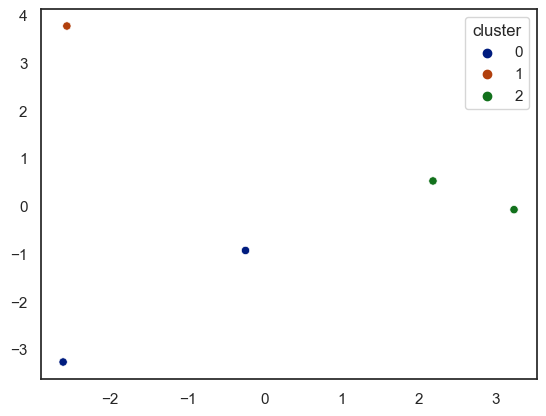

In [38]:
# Melakukan visualisasi 2 dimensi:

pca_2d_inf = PCA(n_components=2)
pca_2d_inf.fit(data_scaled)

inf_pca_2d = pca_2d_inf.fit_transform(data_scaled)

sns.scatterplot(x=inf_pca_2d[:,0], y=inf_pca_2d[:,1], hue=new_data['cluster'], palette='dark')

**Insight:**

*From the results above it can be seen that the model can segment the newly provided data.*

# **L - CONCEPTUAL PROBLEMS**

## **L.1 - WHAT IS INERTIA IN K-MEANS ALGORITHM?**

**Inertia** in the K-Means algorithm refers to the Within-Cluster Sum of Squares (WCSS), namely the sum of the squares of the distance between data points in one cluster and the cluster center. Inertia is used as a metric to measure the extent to which data points in a cluster tend to be close to the cluster center. The smaller the inertia value, the better, because it indicates that points in a cluster tend to be close to each other. In the elbow method analysis, we try various values of k (number of clusters) and calculate the inertia value for each k. The goal is to determine the optimal number of clusters. However, how do we determine the optimal k? One commonly used method is to look at the change in inertia value as the number of clusters increases.

## **L.2 - WHAT IS ELBOW METHOD?**

**Elbow Method** is a method used in clustering analysis to determine the optimal number of clusters in a dataset. This method is known as "Elbow" because the graph resulting from the analysis often has a shape that resembles an elbow when the value of the number of different clusters is plotted against inertia (Within-Cluster Sum of Squares, WCSS). The following are several points that explain the Elbow Method in the context of consumer segmentation in banking datasets:

**Reason for Use:**

- Elbow Method is used to determine the optimal number of clusters for analyzing consumer segmentation in this dataset.

- The goal is to understand how many groups (clusters) are most suitable for dividing consumers based on certain behaviors or characteristics, such as transactions, savings, or credit history.

- By determining the optimal number of clusters, banks can identify different consumer groups to develop more effective marketing strategies and provide appropriate services.


**How ​​to use:**

- The first step is to apply a clustering algorithm (such as K-Means) with various values of k (number of clusters).

- Then, for each k value, calculate the inertia (WCSS), which is the sum of the squares of the distance between data points in one cluster and the cluster center.

- Plot the WCSS value against the number of clusters. This will produce a graph showing the decrease in WCSS as the number of clusters increases.

- The "elbow" point is the place where the WCSS decline begins to slow significantly. This is the optimal number of clusters.


**Excess:**

- Simple and understandable.

- Provides useful guidance in determining the optimal number of clusters.

- Useful for avoiding over-segmentation or under-segmentation in clustering analysis.


**Weakness:**

- The "elbow" point is not always clear in the graph, especially if the data does not have a clear distribution.

- Sometimes, graphs do not have a shape that resembles an elbow, making it difficult to determine the optimal number of clusters.

- The Elbow Method only provides initial guidance and does not provide a definitive method for determining the optimal number of clusters.


It is important to remember that in consumer segmentation analysis, the Elbow method is just one of several techniques that can be used. In addition, interpretation and in-depth understanding of data characteristics and business needs are also required to make accurate decisions about the optimal number of clusters.

# **M - MODEL ANALYSIS**

K-Means clustering is an unsupervised machine learning model algorithm used for customer segmentation in banking data sets. It divides customers into different groups based on their similarities in various features. In this project, I used K-Means with k=3 to identify three customer segments.

**Model Advantages:**

- **Interpretability:** K-Means provides results that are easy to interpret, making it suitable for customer segmentation, which wants clear and meaningful clusters.

- **Scalability:** K-Means can handle large data sets efficiently, so it can be applied to real-world scenarios with extensive customer data.

- **No Assumptions:** K-Means makes no assumptions about the shape or distribution of the data, making it versatile and powerful.

**Model Limitations:**

- **Sensitivity to Initialization:** K-Means results may vary depending on the initial placement of centroids, which may result in suboptimal cluster assignment.

- **Equal Variance Assumption:** K-Means assumes that clusters have equal variance, which may not be true in all cases.

- **Requires pre-defined k:** The choice of number of clusters (k) must be determined in advance, which can be subjective and impact the quality of the segmentation.

- **Sensitive to Outliers:** K-Means can be influenced by outliers, potentially affecting the accuracy of cluster assignment.

In conclusion, K-Means clustering is a valuable tool for customer segmentation in the banking industry, providing actionable insights for targeted marketing, product development, and retention strategies. However, careful consideration of the initialization method and selection of appropriate k values is essential to obtain meaningful results.

# **N - CONCLUSION**

**Conclusion:**
Through the use of the K-Means clustering model in credit card data analysis, I succeeded in achieving the main objective of this project. Here is a summary of achievements:

1. **Customer Segmentation:** I was able to identify three main customer segments, namely "High-Value Shoppers," "Moderate Shoppers," and "Low-Activity Users," based on their transaction behavior.

2. **Marketing Strategy Optimization:** With a better understanding of customer preferences and behavior in each segment, banks can adopt more targeted marketing strategies. This includes targeting marketing campaigns, increasing customer retention, and appropriate product promotions.

3. **Increased Customer Retention:** Customer segmentation allows banks to design more effective retention strategies, especially for the "High-Value Shoppers" segment which may be a significant source of revenue.

4. **Product Development**: Banks can use insights from customer segmentation to develop new products or services that better suit customer preferences within each segment.

5. **Improved Business Performance**: By adapting marketing and service strategies based on the characteristics of each customer segment, banks have the potential to improve overall business performance, including increased revenue and customer retention.

Overall, this project provides valuable insights that banks can use to optimize their business strategy, improve customer experience, and achieve the project's key objectives.

# **O - FURTHER IMPROVEMENT**

1. **Incorporate Additional Data:** Collect and integrate more comprehensive customer data, such as demographic information, browsing behavior, or customer feedback. This enriched dataset can provide a deeper understanding of customer segments and preferences.

2. **Dynamic Clustering:** Implement a dynamic clustering approach that adapts to changing customer behavior over time. Retrain the clustering model periodically to accommodate changing customer preferences.

3. **Feature Engineering:** Explore advanced feature engineering techniques to create more informative variables for clustering, thereby improving segment assignment accuracy.

4. **Advanced Algorithms:** Experiment with alternative clustering algorithms, such as hierarchical clustering or density-based clustering, to identify hidden patterns that K-Means may not capture.

5. **Customer Surveys:** Conduct customer surveys or feedback analysis to validate and refine identified segments, ensuring alignment with actual customer perceptions and needs.

6. **Personalized Recommendations:** Develop personalized product recommendations and marketing strategies for each segment to increase customer engagement and satisfaction.

7. **A/B Testing:** Implement A/B testing for marketing campaigns and product offerings tailored to each segment to measure strategy effectiveness and make data-driven adjustments.

8. **Machine Learning Models:** Explore the use of machine learning models, such as predictive analytics or recommendation systems, to improve customer segmentation and engagement.

By combining these improvements, the project can develop into a more sophisticated and dynamic customer segmentation system, giving the bank a competitive advantage and a better customer-centric strategy.